In [1]:
import geopandas as gpd
import rasterio
from rasterstats import point_query

# Load shapefile data (MODIS Fire Points)
FRP = gpd.read_file("/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.shp")
FRP = FRP[FRP['LULC_Class'] == 1.0]

In [2]:
# # Check unique values in the LULC_Class column
# unique_lulc_classes = FRP['year'].unique()
# print(unique_lulc_classes)

# # Check unique values and their counts in the LULC_Class column
# lulc_class_counts = FRP['year'].value_counts()
# print(lulc_class_counts)

# Annual Mean FRP

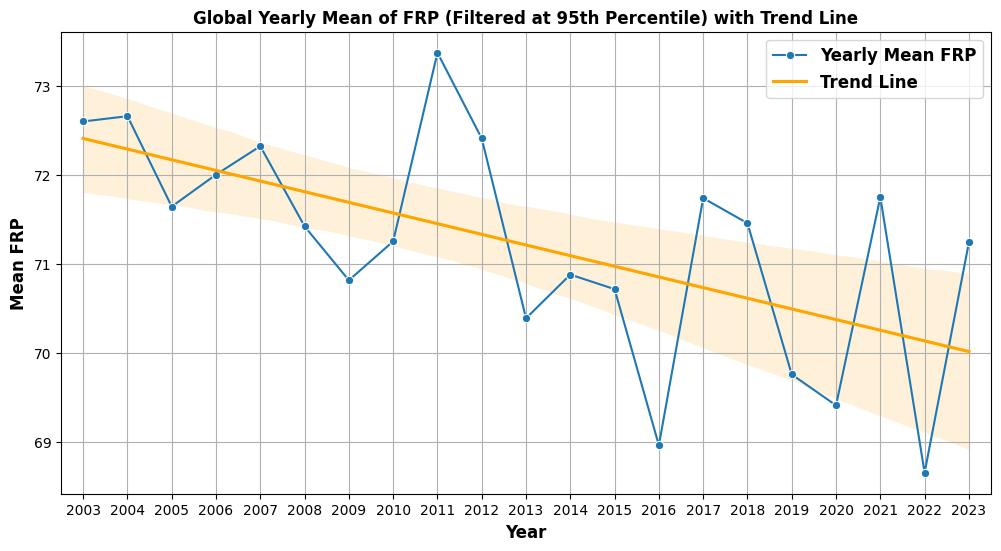

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'year' column to integer if it's not already
FRP['year'] = FRP['year'].astype(int)

# Calculate the 95th percentile for the FRP values
frp_95th_percentile = FRP['frp'].quantile(0.95)

# Filter the data to include only FRP values below or equal to the 95th percentile
FRP_filtered = FRP[FRP['frp'] <= frp_95th_percentile]

# Calculate the yearly mean of the filtered FRP data
yearly_mean_frp = FRP_filtered.groupby('year')['frp'].mean().reset_index()

# Plot the yearly mean FRP line graph with trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_mean_frp, x='year', y='frp', label='Yearly Mean FRP', marker='o')
sns.regplot(data=yearly_mean_frp, x='year', y='frp', scatter=False, color='orange', label='Trend Line')

# Set x-axis range from 2003 to 2023 and set ticks for each year
plt.xlim(2002.5, 2023.5)
plt.xticks(range(2003, 2024, 1))  # Set ticks for each year

# Customize the plot
plt.title('Global Yearly Mean of FRP (Filtered at 95th Percentile) with Trend Line', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Mean FRP', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 12, 'weight': 'bold'})
plt.grid(True)
plt.show()

# Annual Sum FRP

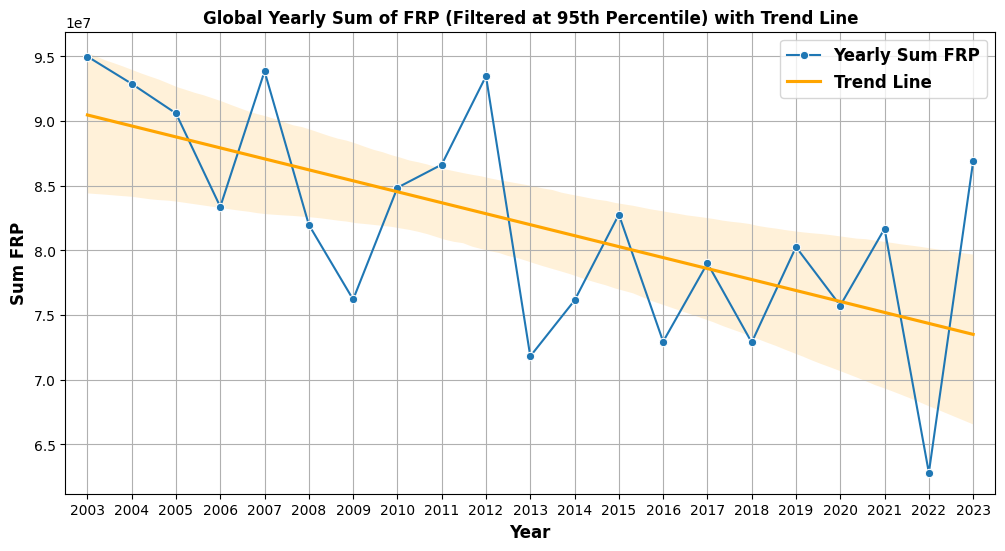

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Convert the 'year' column to integer if it's not already
FRP['year'] = FRP['year'].astype(int)

# Calculate the 95th percentile for the FRP values
frp_95th_percentile = FRP['frp'].quantile(0.95)

# Filter the data to include only FRP values below or equal to the 95th percentile
FRP_filtered = FRP[FRP['frp'] <= frp_95th_percentile]

# Calculate the yearly mean of the filtered FRP data
yearly_mean_frp = FRP_filtered.groupby('year')['frp'].sum().reset_index()

# Plot the yearly mean FRP line graph with trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_mean_frp, x='year', y='frp', label='Yearly Sum FRP', marker='o')
sns.regplot(data=yearly_mean_frp, x='year', y='frp', scatter=False, color='orange', label='Trend Line')

# Set x-axis range from 2003 to 2023 and set ticks for each year
plt.xlim(2002.5, 2023.5)
plt.xticks(range(2003, 2024, 1))  # Set ticks for each year

# Customize the plot
plt.title('Global Yearly Sum of FRP (Filtered at 95th Percentile) with Trend Line', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Sum FRP', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 12, 'weight': 'bold'})
plt.grid(True)
plt.show()

# Tau Cluster Wise yearly MEAN FRP Trend @ [95 %tile Tau Cluster Wise]

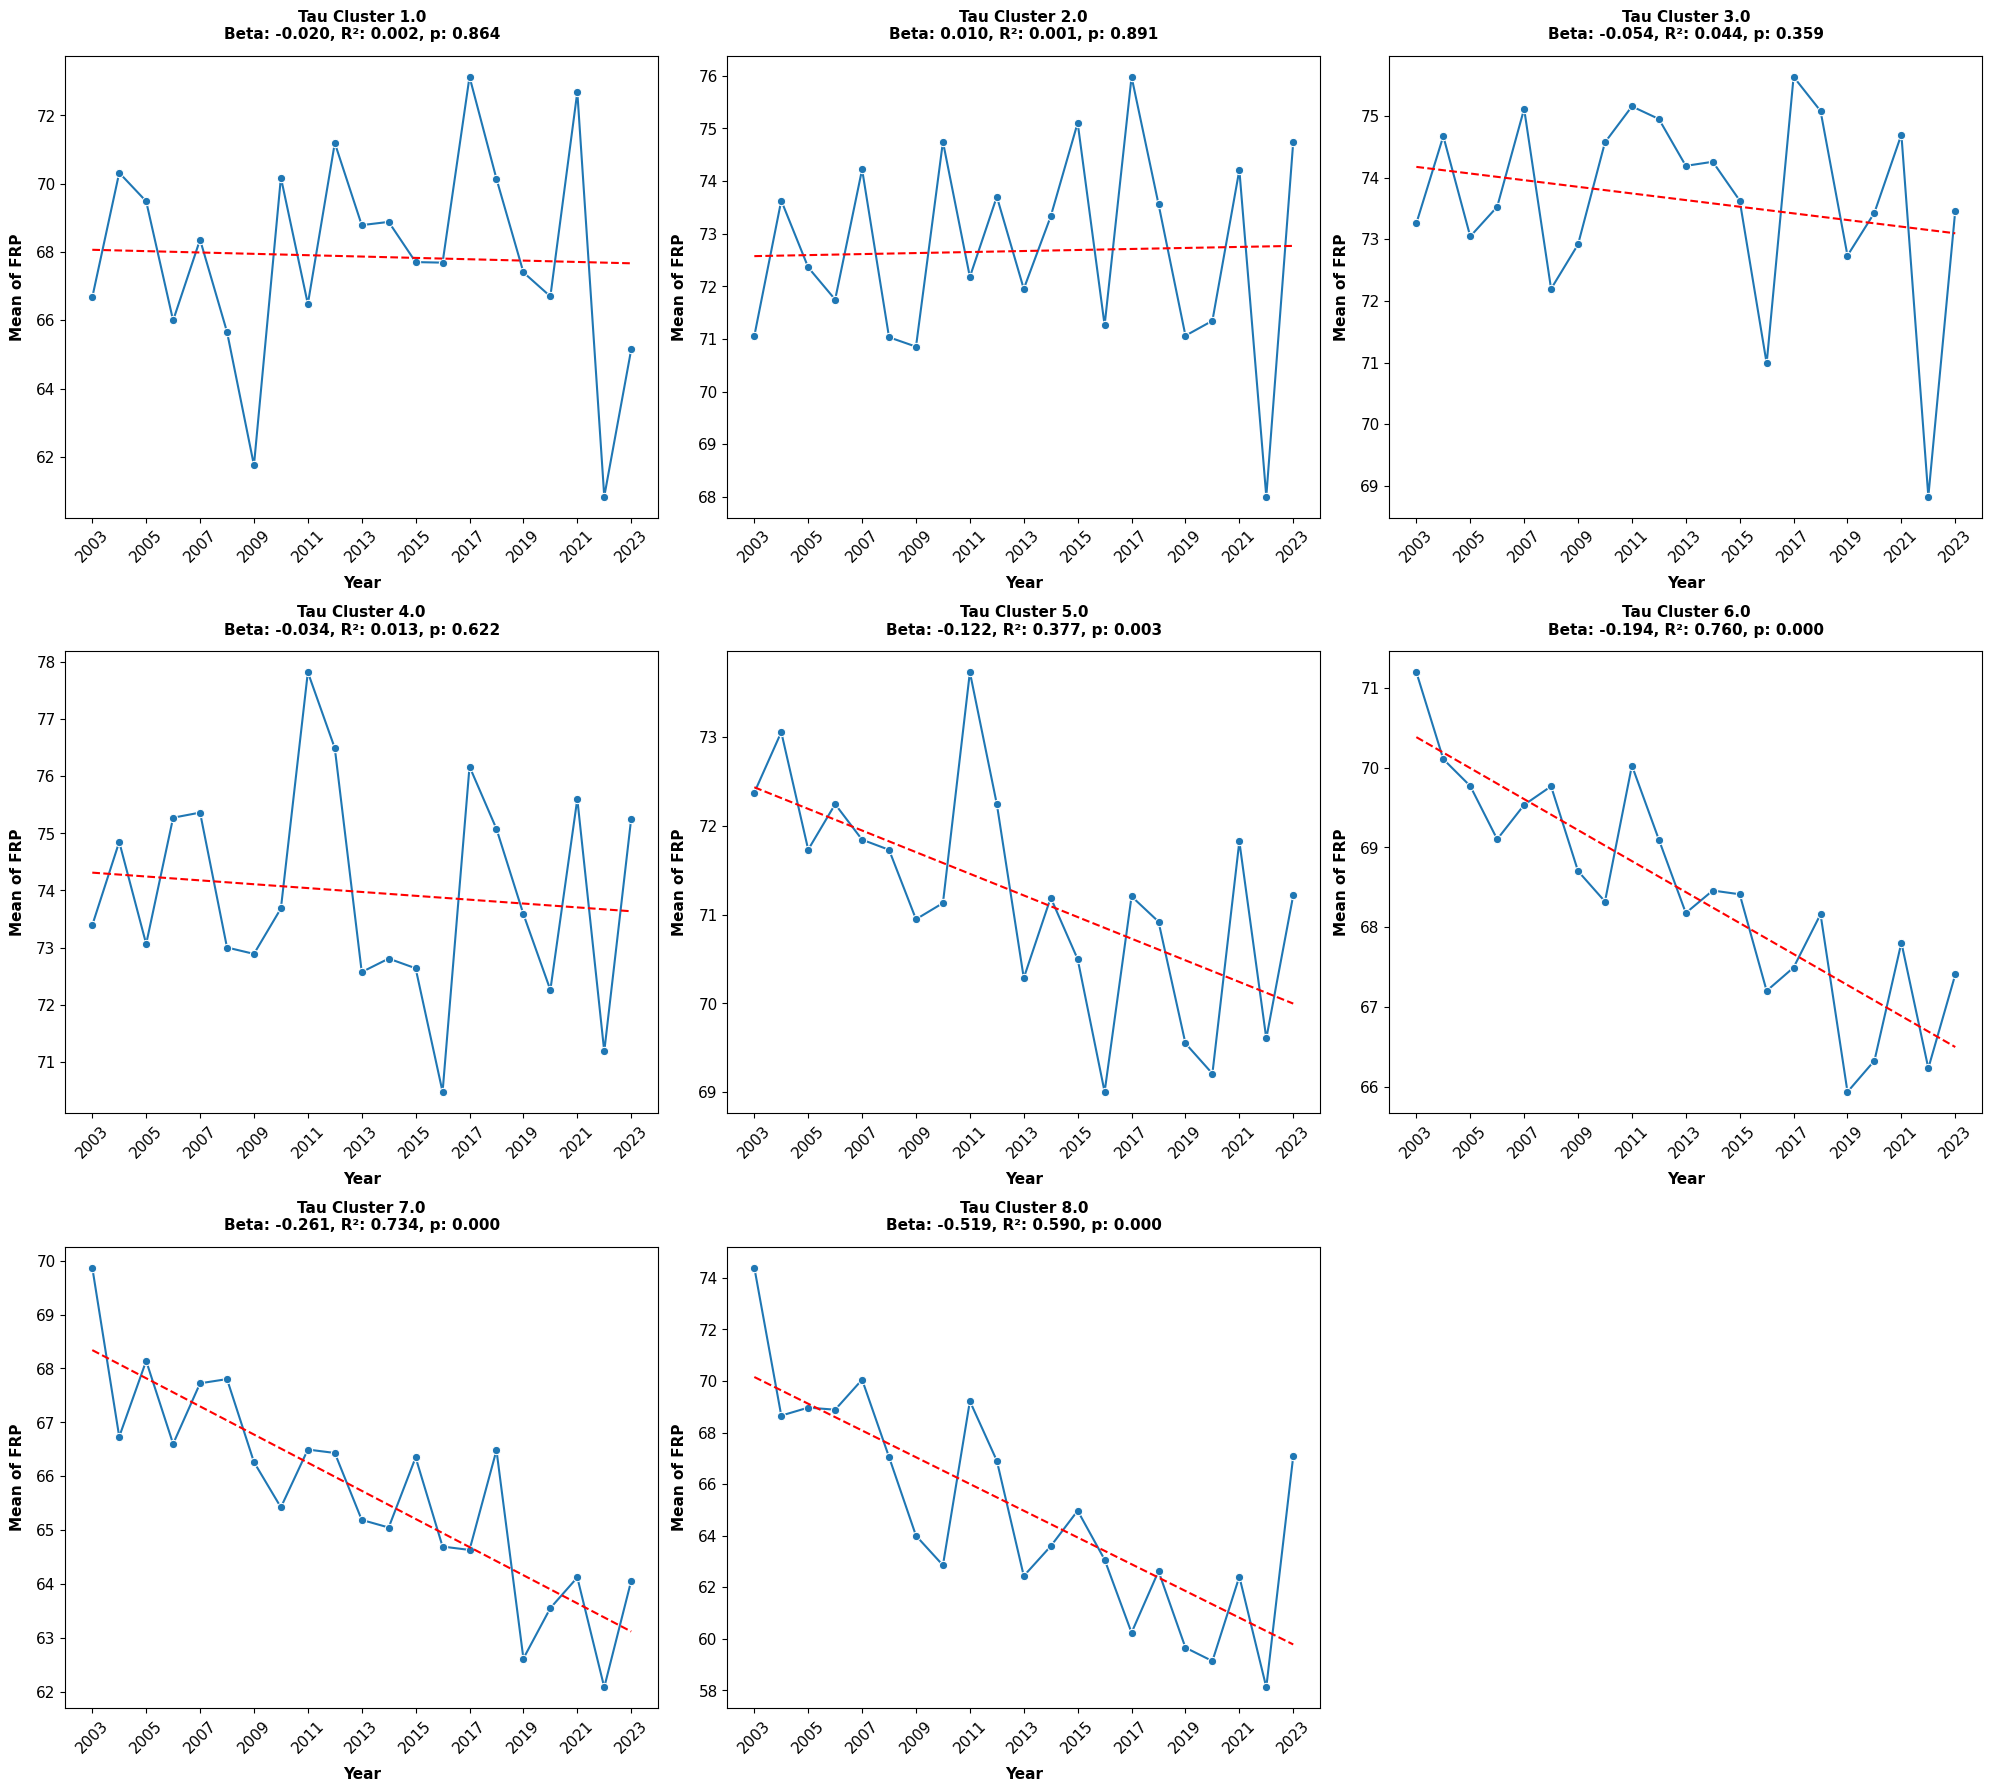

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Convert the 'year' and 'Tau' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Tau'] = FRP['Tau'].astype(float)

# Remove rows where Tau is NaN
FRP = FRP.dropna(subset=['Tau'])

# Get the unique Tau values, excluding Tau = 9
taus = sorted(FRP['Tau'].unique())
taus = [tau for tau in taus if tau != 9.0]  # Remove Tau = 9

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
# global_y_min = FRP['frp'].min() * 0.9  # 10% below the minimum FRP
# global_y_max = FRP['frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Tau value to create subplots
for i, tau in enumerate(taus, 1):
    # Filter data for each Tau
    tau_data = FRP[FRP['Tau'] == tau]
    
    # Calculate the 95th percentile for this Tau cluster
    tau_95th_percentile = tau_data['frp'].quantile(0.95)
    
    # Filter the data to keep only values below or equal to the 95th percentile
    tau_data_filtered = tau_data[tau_data['frp'] <= tau_95th_percentile]
    
    # Calculate yearly mean of the filtered FRP data
    yearly_mean_frp = tau_data_filtered.groupby('year')['frp'].mean().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_mean_frp.empty or yearly_mean_frp['frp'].isnull().all():
        continue  # Skip this Tau cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_mean_frp['year'], yearly_mean_frp['frp'])
    trend_line = intercept + slope * yearly_mean_frp['year']
    
    # Create subplot for each Tau
    plt.subplot((len(taus) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_mean_frp, x='year', y='frp', marker='o')
    plt.plot(yearly_mean_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the Tau cluster number and statistics below the title
    plt.title(f'Tau Cluster {tau}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Mean of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# Tau Cluster wise yearly SUM FRP Trend @ [95 %tile Tau Cluster Wise]

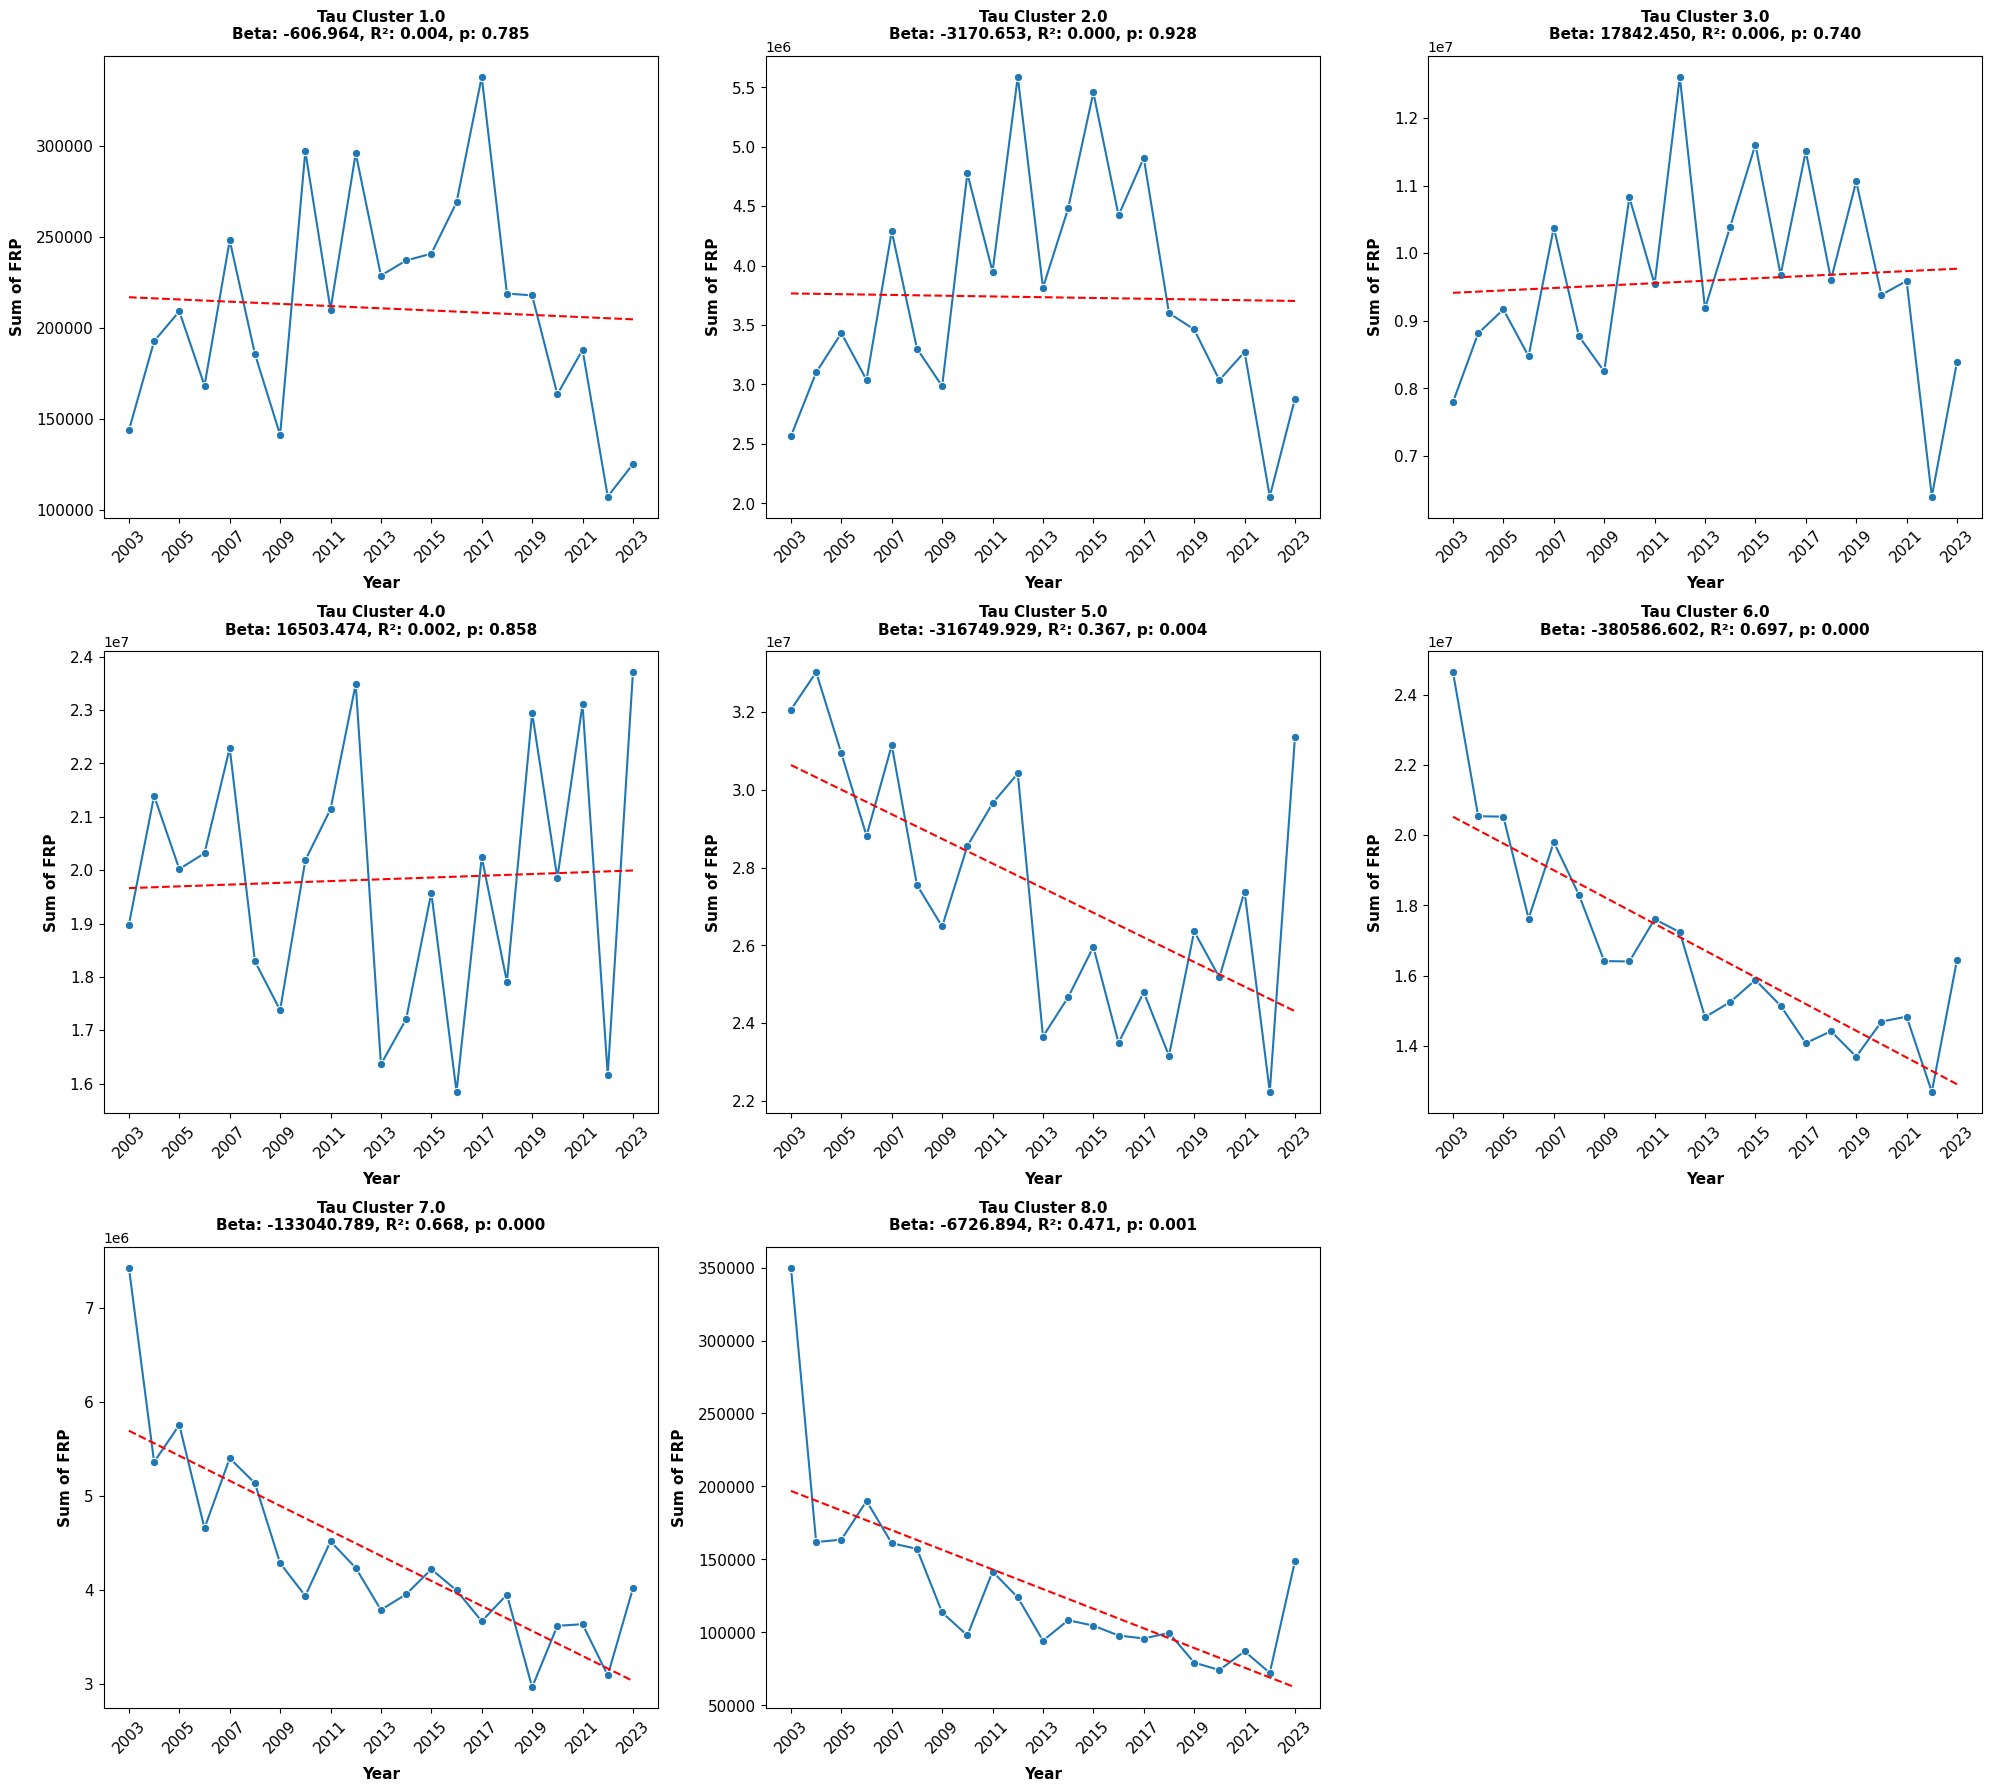

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Convert the 'year' and 'Tau' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Tau'] = FRP['Tau'].astype(float)

# Remove rows where Tau is NaN
FRP = FRP.dropna(subset=['Tau'])

# Get the unique Tau values, excluding Tau = 9
taus = sorted(FRP['Tau'].unique())
taus = [tau for tau in taus if tau != 9.0]  # Remove Tau = 9

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
global_y_min = FRP['frp'].min() * 0.9  # 10% below the minimum FRP
global_y_max = FRP['frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Tau value to create subplots
for i, tau in enumerate(taus, 1):
    # Filter data for each Tau
    tau_data = FRP[FRP['Tau'] == tau]
    
    # Calculate the 95th percentile for this Tau cluster
    tau_95th_percentile = tau_data['frp'].quantile(0.95)
    
    # Filter the data to keep only values below or equal to the 95th percentile
    tau_data_filtered = tau_data[tau_data['frp'] <= tau_95th_percentile]
    
    # Calculate yearly mean of the filtered FRP data
    yearly_mean_frp = tau_data_filtered.groupby('year')['frp'].sum().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_mean_frp.empty or yearly_mean_frp['frp'].isnull().all():
        continue  # Skip this Tau cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_mean_frp['year'], yearly_mean_frp['frp'])
    trend_line = intercept + slope * yearly_mean_frp['year']
    
    # Create subplot for each Tau
    plt.subplot((len(taus) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_mean_frp, x='year', y='frp', marker='o')
    plt.plot(yearly_mean_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the Tau cluster number and statistics below the title
    plt.title(f'Tau Cluster {tau}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Sum of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# Distribution Plot

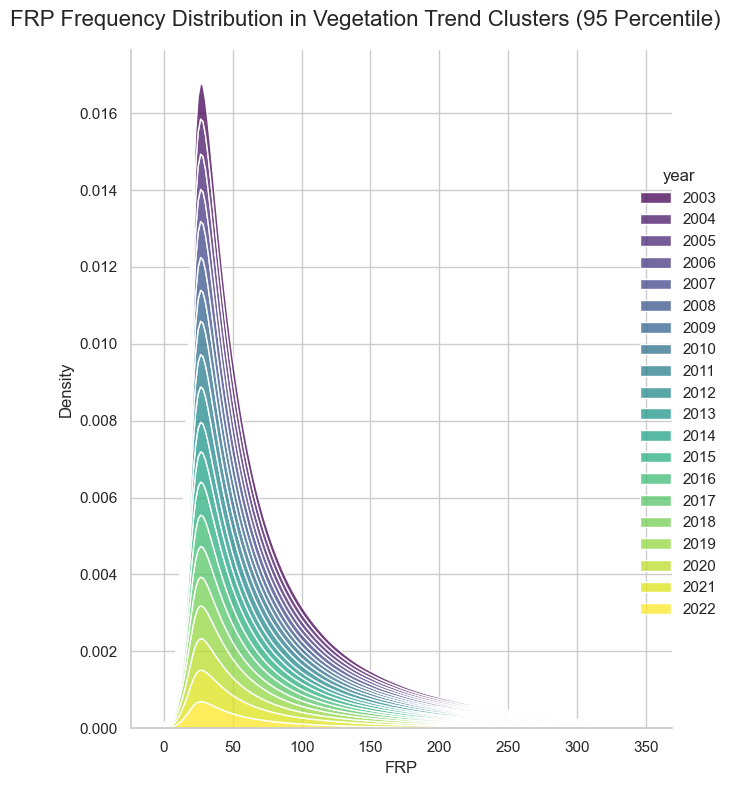

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

# Assuming FRP data is already loaded as a DataFrame named 'FRP'

# Convert the 'year' column to integer if it's not already
FRP['year'] = FRP['year'].astype(int)

# Initialize a list to store filtered data for each year
filtered_data = []

# Loop through each year and filter data to the 95th percentile
for year in FRP['year'].unique():
    # Filter data for the specific year
    year_data = FRP[FRP['year'] == year]
    
    # Apply 95th percentile filter
    percentile_95 = year_data['frp'].quantile(0.95)
    year_data = year_data[year_data['frp'] <= percentile_95]
    
    # Append the filtered data with a 'year' column to the list
    filtered_data.append(year_data)

# Concatenate all yearly data into a single DataFrame for plotting
filtered_FRP = pd.concat(filtered_data)

# Use sns.displot to create a KDE plot for each year
g = sns.displot(
    data=filtered_FRP, 
    x="frp", 
    hue="year", 
    kind="kde", 
    fill=True, 
    height=8, 
    aspect=0.7, 
    palette="viridis", 
    multiple="stack"
)

# Customize plot
g.set_axis_labels("FRP", "Density")
g.fig.suptitle("FRP Frequency Distribution in Vegetation Trend Clusters (95 Percentile)", fontsize=16)

# Adjust plot layout
plt.tight_layout()
plt.show()

In [74]:
# import geopandas as gpd

# # # Load shapefile data (MODIS Fire Points)
# # file_path = "/Users/ceedindia/Documents/FIRE/Final_FRP_filtered.shp"  # Update if necessary
# # FRP = gpd.read_file(file_path)

# # Save the data as a .csv file
# csv_path = "/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.csv"
# FRP.to_csv(csv_path, index=False)

# print(f"Data saved to {csv_path}")

Data saved to /Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.csv


# Biome Wise FRP SUM Sub Plots @ [95 %tile Biome Wise]

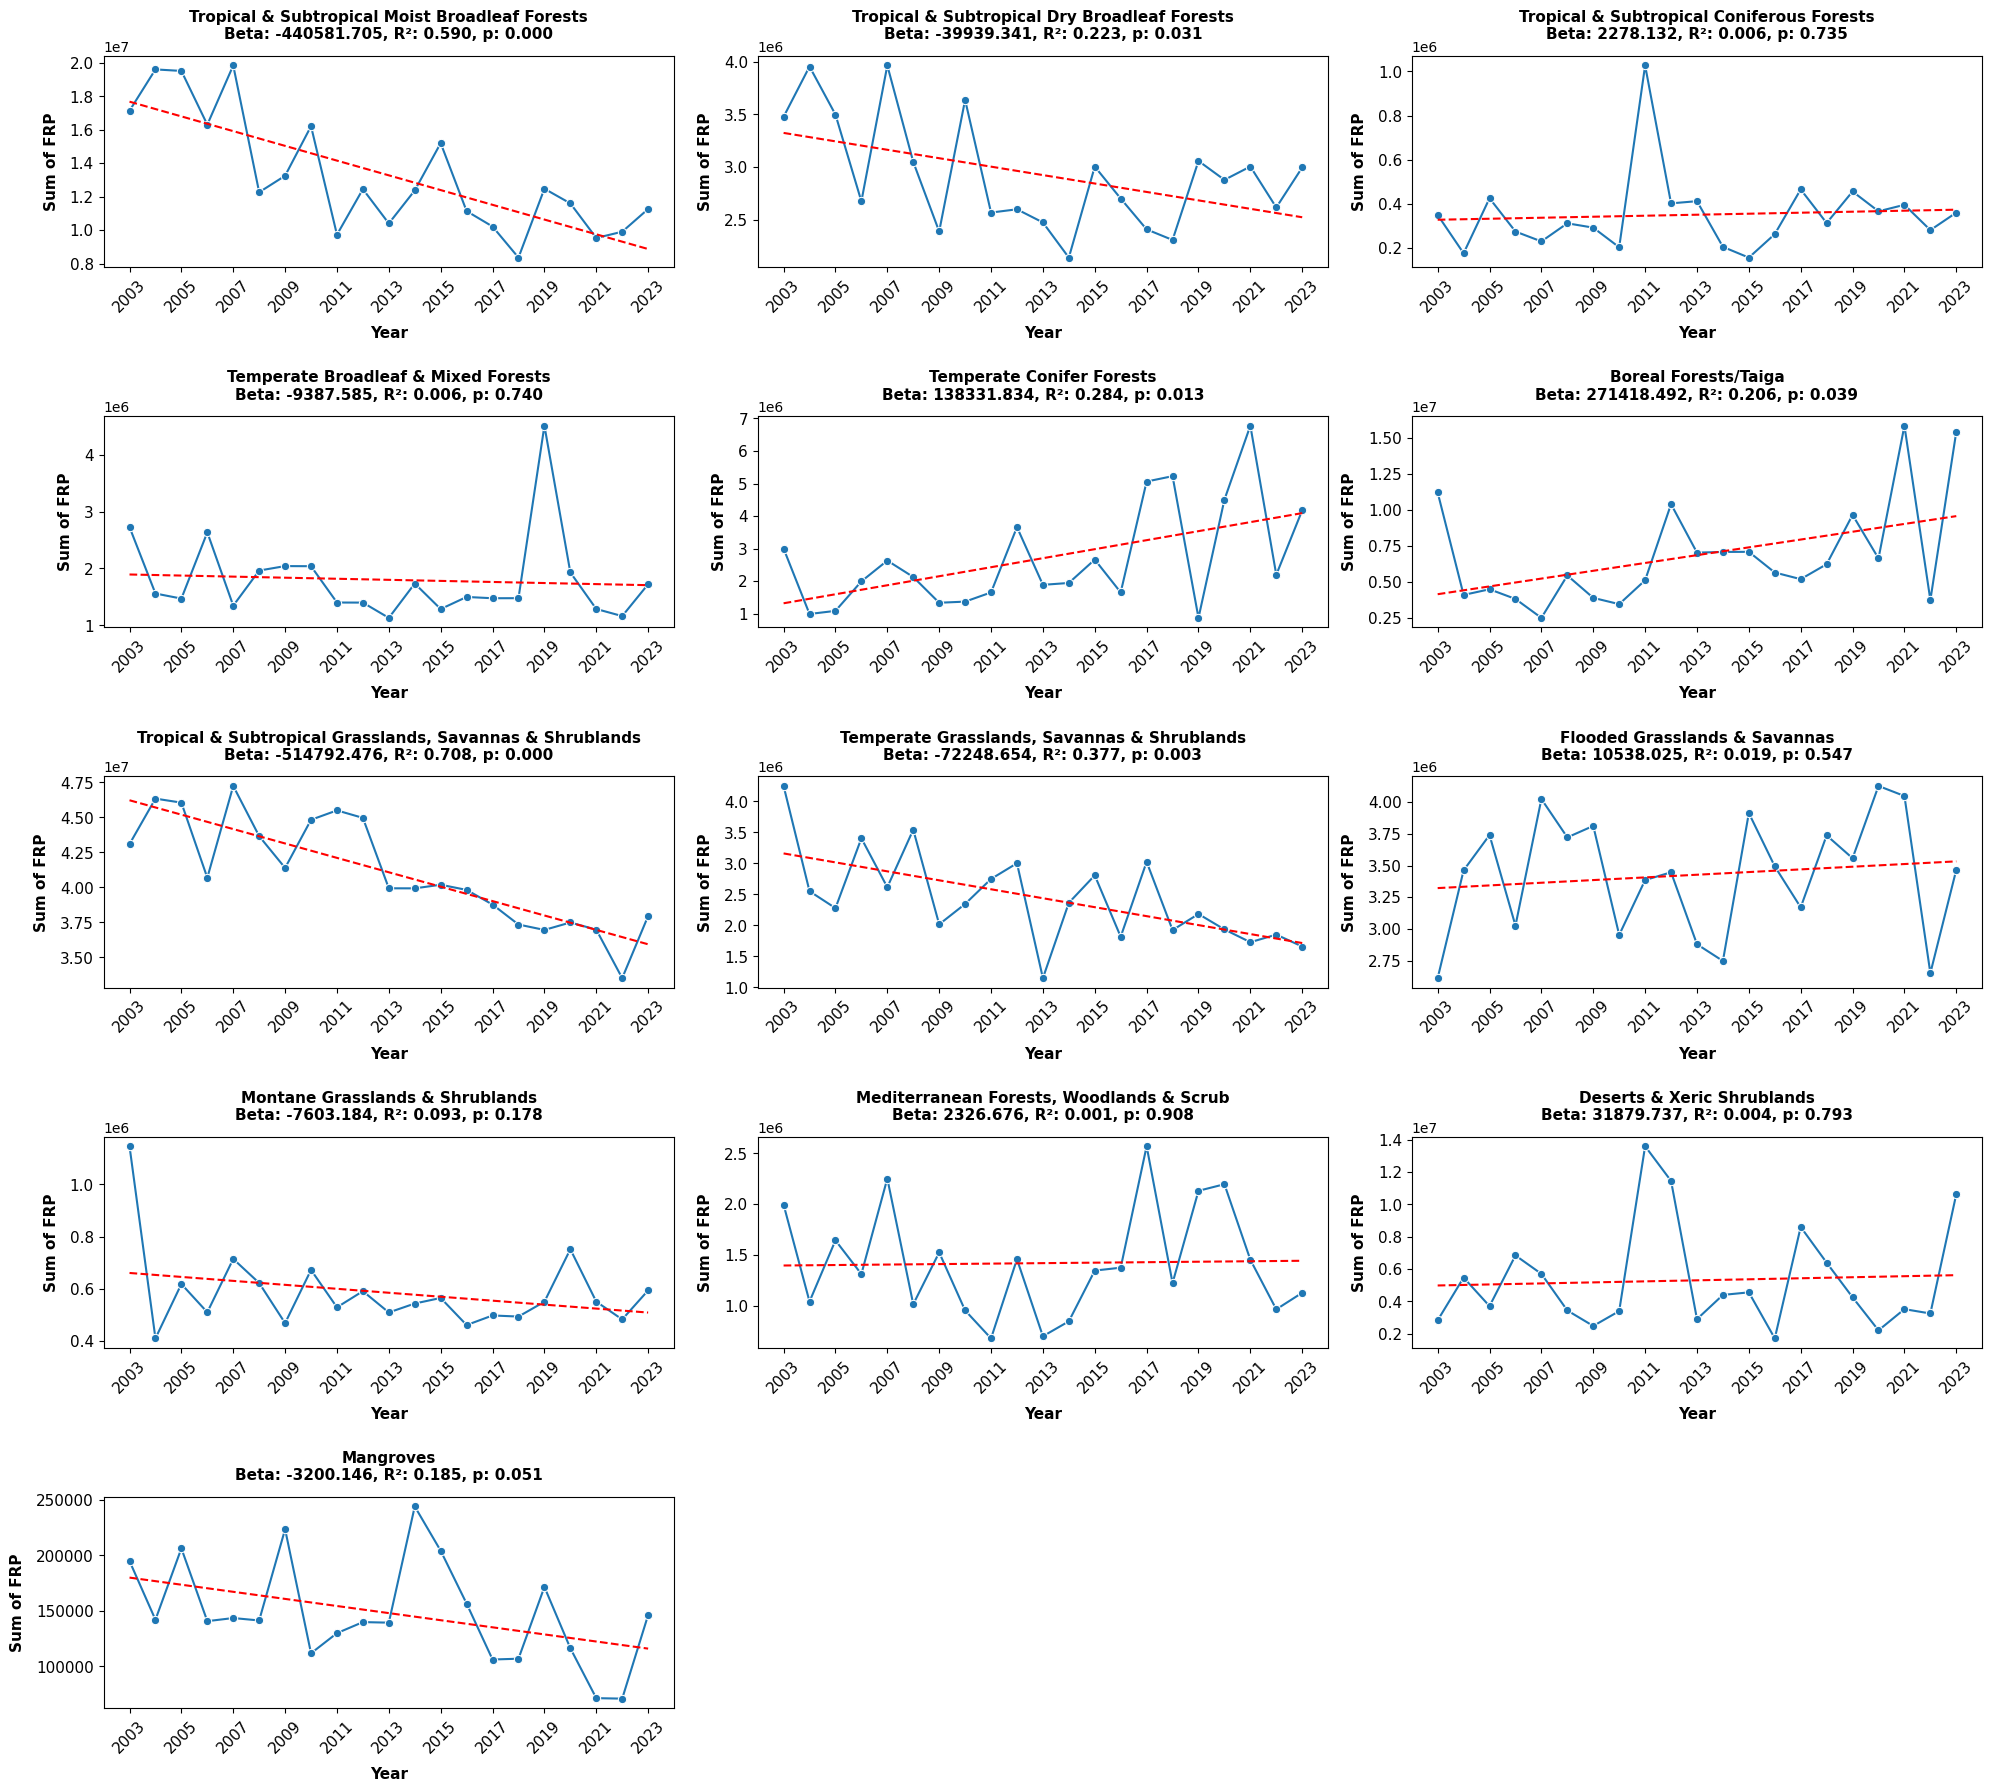

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Biome names based on your mapping (excluding Biome 11)
biome_names = {
    1.0: "Tropical & Subtropical Moist Broadleaf Forests",
    2.0: "Tropical & Subtropical Dry Broadleaf Forests",
    3.0: "Tropical & Subtropical Coniferous Forests",
    4.0: "Temperate Broadleaf & Mixed Forests",
    5.0: "Temperate Conifer Forests",
    6.0: "Boreal Forests/Taiga",
    7.0: "Tropical & Subtropical Grasslands, Savannas & Shrublands",
    8.0: "Temperate Grasslands, Savannas & Shrublands",
    9.0: "Flooded Grasslands & Savannas",
    10.0: "Montane Grasslands & Shrublands",
    12.0: "Mediterranean Forests, Woodlands & Scrub",
    13.0: "Deserts & Xeric Shrublands",
    14.0: "Mangroves"
}

# Convert the 'year' and 'Biome' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Biome'] = FRP['Biome'].astype(float)

# Remove rows where Biome is NaN or Biome is 11
FRP = FRP.dropna(subset=['Biome'])
FRP = FRP[FRP['Biome'] != 11.0]  # Exclude Biome 11

# Get the unique Biome values
biomes = sorted(FRP['Biome'].unique())

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
# global_y_min = FRP['frp'].min() * 0.9  # 10% below the minimum FRP
# global_y_max = FRP['frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Biome value to create subplots
for i, biome in enumerate(biomes, 1):
    # Filter data for each Biome
    biome_data = FRP[FRP['Biome'] == biome]
    
    # Calculate the 95th percentile for this Biome cluster
    biome_95th_percentile = biome_data['frp'].quantile(0.95)
    
    # Filter the data to keep only values below or equal to the 95th percentile
    biome_data_filtered = biome_data[biome_data['frp'] <= biome_95th_percentile]
    
    # Calculate yearly sum of the filtered FRP data
    yearly_sum_frp = biome_data_filtered.groupby('year')['frp'].sum().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_sum_frp.empty or yearly_sum_frp['frp'].isnull().all():
        continue  # Skip this Biome cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_sum_frp['year'], yearly_sum_frp['frp'])
    trend_line = intercept + slope * yearly_sum_frp['year']
    
    # Create subplot for each Biome
    plt.subplot((len(biomes) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_sum_frp, x='year', y='frp', marker='o')
    plt.plot(yearly_sum_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the biome name and statistics below the title
    biome_name = biome_names.get(biome, f"Biome {biome}")
    plt.title(f'{biome_name}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Sum of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# Biome Wise FRP MEAN Sub Plots @ [95 %tile Biome Wise]

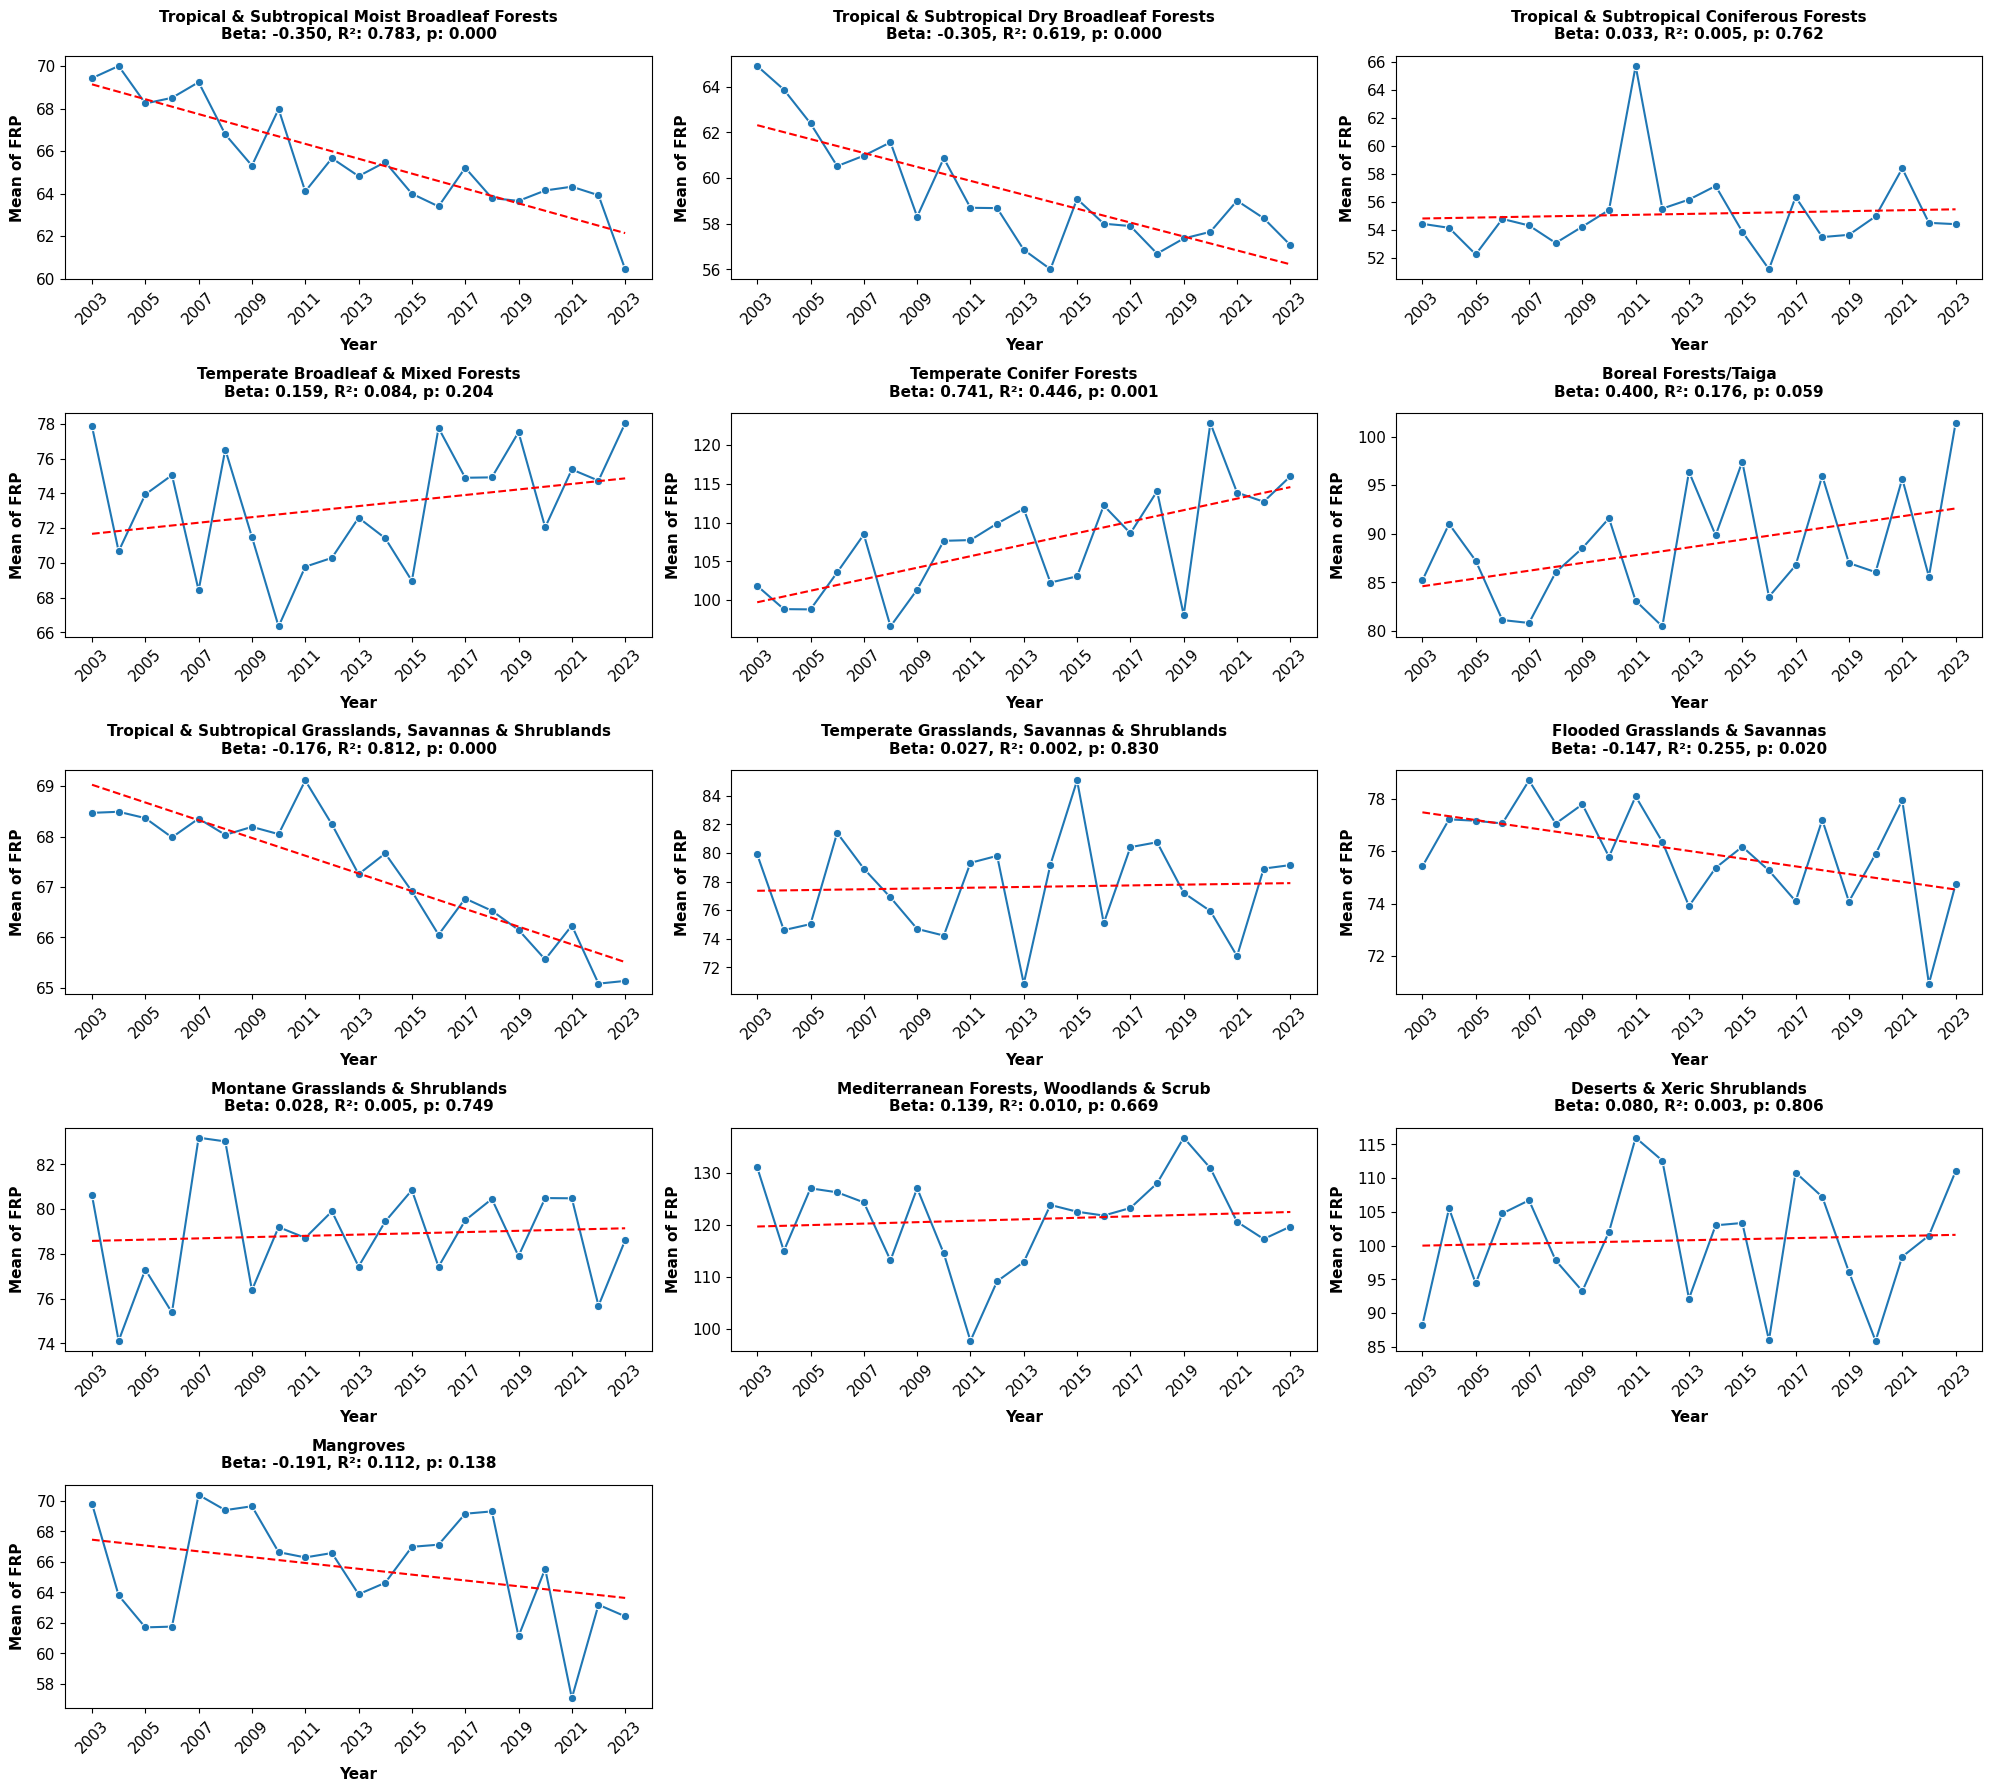

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Biome names based on your mapping (excluding Biome 11)
biome_names = {
    1.0: "Tropical & Subtropical Moist Broadleaf Forests",
    2.0: "Tropical & Subtropical Dry Broadleaf Forests",
    3.0: "Tropical & Subtropical Coniferous Forests",
    4.0: "Temperate Broadleaf & Mixed Forests",
    5.0: "Temperate Conifer Forests",
    6.0: "Boreal Forests/Taiga",
    7.0: "Tropical & Subtropical Grasslands, Savannas & Shrublands",
    8.0: "Temperate Grasslands, Savannas & Shrublands",
    9.0: "Flooded Grasslands & Savannas",
    10.0: "Montane Grasslands & Shrublands",
    12.0: "Mediterranean Forests, Woodlands & Scrub",
    13.0: "Deserts & Xeric Shrublands",
    14.0: "Mangroves"
}

# Convert the 'year' and 'Biome' columns to appropriate types
FRP['year'] = FRP['year'].astype(int)
FRP['Biome'] = FRP['Biome'].astype(float)

# Remove rows where Biome is NaN or Biome is 11
FRP = FRP.dropna(subset=['Biome'])
FRP = FRP[FRP['Biome'] != 11.0]  # Exclude Biome 11

# Get the unique Biome values
biomes = sorted(FRP['Biome'].unique())

# Calculate global y_min and y_max for consistent y-axis limits across all subplots
# global_y_min = FRP['frp'].min() * 0.9  # 10% below the minimum FRP
# global_y_max = FRP['frp'].max() * 1.1  # 10% above the maximum FRP

# Set up the figure for subplots with increased height
plt.figure(figsize=(20, 18))

# Loop over each unique Biome value to create subplots
for i, biome in enumerate(biomes, 1):
    # Filter data for each Biome
    biome_data = FRP[FRP['Biome'] == biome]
    
    # Calculate the 95th percentile for this Biome cluster
    biome_95th_percentile = biome_data['frp'].quantile(0.95)
    
    # Filter the data to keep only values below or equal to the 95th percentile
    biome_data_filtered = biome_data[biome_data['frp'] <= biome_95th_percentile]
    
    # Calculate yearly sum of the filtered FRP data
    yearly_sum_frp = biome_data_filtered.groupby('year')['frp'].mean().reset_index()
    
    # Check if there is data available and if no NaN values are present in the columns
    if yearly_sum_frp.empty or yearly_sum_frp['frp'].isnull().all():
        continue  # Skip this Biome cluster if there's no valid data
    
    # Calculate linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(yearly_sum_frp['year'], yearly_sum_frp['frp'])
    trend_line = intercept + slope * yearly_sum_frp['year']
    
    # Create subplot for each Biome
    plt.subplot((len(biomes) + 2) // 3, 3, i)
    sns.lineplot(data=yearly_sum_frp, x='year', y='frp', marker='o')
    plt.plot(yearly_sum_frp['year'], trend_line, 'r--')
    
    # Set x-axis range with padding and ticks for each subplot
    plt.xlim(2002, 2024)  # Slightly extend the range for padding
    plt.xticks(range(2003, 2024, 2), rotation=45, fontsize=11)  # Set every 2 years for readability
    plt.yticks(fontsize=11)  # Increase y-axis tick font size
    
    # Set global y-axis limits for consistency
    plt.ylim()
    
    # Customize each subplot with the biome name and statistics below the title
    biome_name = biome_names.get(biome, f"Biome {biome}")
    plt.title(f'{biome_name}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}, p: {p_value:.3f}', 
              fontsize=11, fontweight='bold', pad=12)
    plt.xlabel('Year', fontsize=11, fontweight='bold', labelpad=8)
    plt.ylabel('Mean of FRP', fontsize=11, fontweight='bold', labelpad=8)
    
    plt.grid(False)

# Adjust layout and add extra padding to prevent labels from getting cut off
plt.tight_layout(pad=1.0)
plt.show()

# 1 Degree FRP Analysis @ [95 %tile Grid Wise]

In [9]:
import geopandas as gpd
import pandas as pd
import numpy as np

# Load the point shapefile and grid shapefile
points_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.shp")
grid_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/1D_Grid_globe.shp")

# Ensure both shapefiles have the same CRS
points_gdf = points_gdf.to_crs(epsg=4326)
grid_gdf = grid_gdf.to_crs(epsg=4326)

# Fix invalid geometries if present
grid_gdf = grid_gdf[grid_gdf.is_valid]
points_gdf = points_gdf[points_gdf.is_valid]

# Perform spatial join
joined_gdf = gpd.sjoin(grid_gdf, points_gdf, how="inner", predicate="intersects")

# Calculate the 95th percentile of FRP for each grid cell and year
percentile_values = (
    joined_gdf.groupby(["id", "year"])
    .agg(percentile_95_frp=("frp", lambda x: np.percentile(x.dropna(), 95)))
    .reset_index()
)

# Merge percentile values back to the main data
joined_gdf = joined_gdf.merge(percentile_values, on=["id", "year"], how="left")

# Filter for points with FRP above the 95th percentile within each grid cell and year
filtered_points = joined_gdf[joined_gdf["frp"] >= joined_gdf["percentile_95_frp"]]

# Calculate the sum of FRP above the 95th percentile for each grid cell and year
sum_values = (
    filtered_points.groupby(["id", "year"])
    .agg(sum_frp_above_95=("frp", "sum"))
    .reset_index()
)

# Merge yearly FRP sums back to the grid shapefile
grid_gdf = grid_gdf.merge(sum_values, on="id", how="left")

# # Save the result to a new shapefile (with yearly data)
# grid_gdf.to_file("/Users/ceedindia/Documents/Research/025deg_Grid_Sum_FRP_Above_95th_Percentile_Yearly.shp")

# # Optionally, plot the results for one specific year (e.g., 2023)
# import matplotlib.pyplot as plt

# # Filter for the year you want to plot, e.g., 2023
# grid_gdf_2023 = grid_gdf[grid_gdf["year"] == 2023]
# grid_gdf_2023.plot(column="sum_frp_above_95", legend=True)
# plt.show()
# Filter out grid cells with NaN values in 'sum_frp_above_95'
grid_gdf_filtered = grid_gdf.dropna(subset=["sum_frp_above_95"])

# 1 Degree Grid Wise SUM @ 95 Percentile Trend Plot

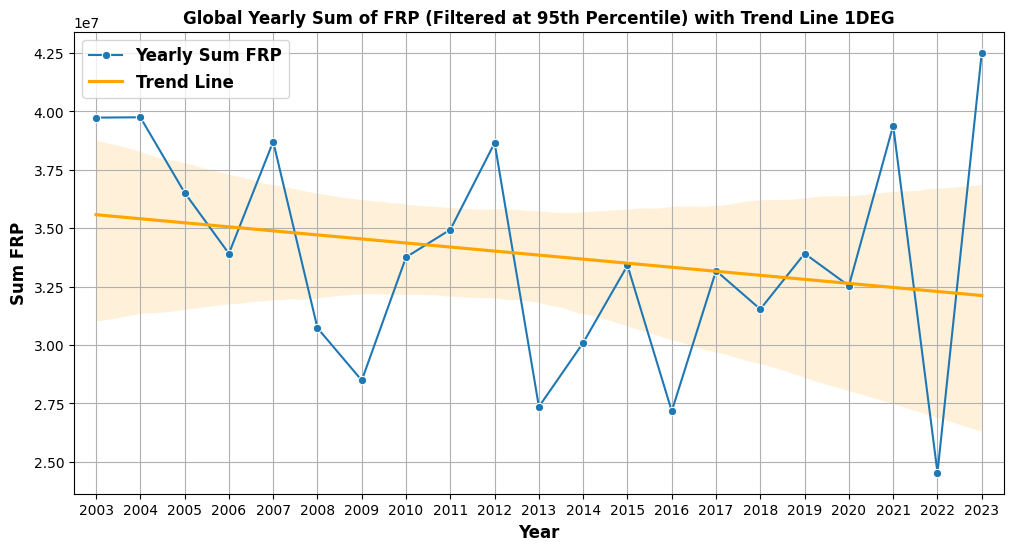

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `FRP_filtered` is your dataframe with 'year' and 'sum_frp_above_95' columns
FRP_filtered = grid_gdf_filtered
# Calculate the yearly sum of the filtered FRP data
yearly_sum_frp = FRP_filtered.groupby('year')['sum_frp_above_95'].sum().reset_index()

# Plot the yearly sum FRP line graph with trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sum_frp, x='year', y='sum_frp_above_95', label='Yearly Sum FRP', marker='o')
sns.regplot(data=yearly_sum_frp, x='year', y='sum_frp_above_95', scatter=False, color='orange', label='Trend Line')

# Set x-axis range from 2003 to 2023 and set ticks for each year
plt.xlim(2002.5, 2023.5)
plt.xticks(range(2003, 2024, 1))  # Set ticks for each year

# Customize the plot
plt.title('Global Yearly Sum of FRP (Filtered at 95th Percentile) with Trend Line 1DEG', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Sum FRP', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 12, 'weight': 'bold'})
plt.grid(True)
plt.show()

# 1 Degree Grid Wise MEAN @ 95 Percentile Trend Plot

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

# Load the point shapefile and grid shapefile
points_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.shp")
grid_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/1D_Grid_globe.shp")

# Ensure both shapefiles have the same CRS
points_gdf = points_gdf.to_crs(epsg=4326)
grid_gdf = grid_gdf.to_crs(epsg=4326)

# Fix invalid geometries if present
grid_gdf = grid_gdf[grid_gdf.is_valid]
points_gdf = points_gdf[points_gdf.is_valid]

# Perform spatial join
joined_gdf = gpd.sjoin(grid_gdf, points_gdf, how="inner", predicate="intersects")

# Calculate the 95th percentile of FRP for each grid cell and year
percentile_values = (
    joined_gdf.groupby(["id", "year"])
    .agg(percentile_95_frp=("frp", lambda x: np.percentile(x.dropna(), 95)))
    .reset_index()
)
# Perform spatial join
joined_gdf = gpd.sjoin(grid_gdf, points_gdf, how="inner", predicate="intersects")

# Calculate the 95th percentile of FRP for each grid cell and year
percentile_values = (
    joined_gdf.groupby(["id", "year"])
    .agg(percentile_95_frp=("frp", lambda x: np.percentile(x.dropna(), 95)))
    .reset_index()
)

# Merge percentile values back to the main data
joined_gdf = joined_gdf.merge(percentile_values, on=["id", "year"], how="left")

# Filter for points with FRP above the 95th percentile within each grid cell and year
filtered_points = joined_gdf[joined_gdf["frp"] >= joined_gdf["percentile_95_frp"]]

# Calculate the mean of FRP above the 95th percentile for each grid cell and year
mean_values = (
    filtered_points.groupby(["id", "year"])
    .agg(mean_frp_above_95=("frp", "mean"))
    .reset_index()
)

# Merge yearly FRP means back to the grid shapefile
grid_gdf = grid_gdf.merge(mean_values, on="id", how="left")

# # Save the result to a new shapefile (with yearly data)
# grid_gdf.to_file("/Users/ceedindia/Documents/Research/025deg_Grid_Mean_FRP_Above_95th_Percentile_Yearly.shp")

# # Optionally, plot the results for one specific year (e.g., 2023)
# import matplotlib.pyplot as plt

# # Filter for the year you want to plot, e.g., 2023
# grid_gdf_2023 = grid_gdf[grid_gdf["year"] == 2023]
# grid_gdf_2023.plot(column="mean_frp_above_95", legend=True)
# plt.show()
# Filter out grid cells with NaN values in 'sum_frp_above_95'
grid_gdf_filtered = grid_gdf.dropna(subset=["mean_frp_above_95"])

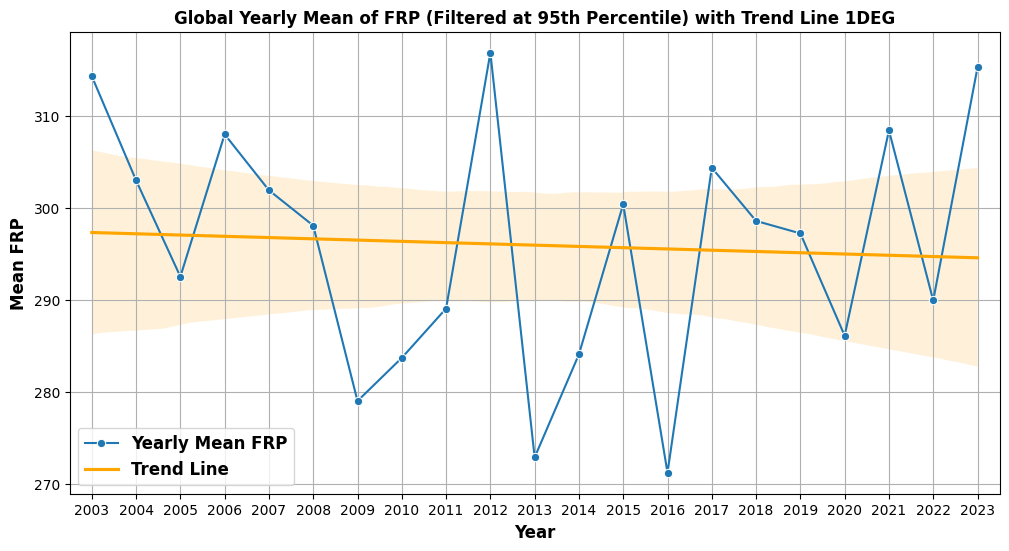

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

FRP_filtered = grid_gdf_filtered
# Calculate the yearly sum of the filtered FRP data
yearly_sum_frp = FRP_filtered.groupby('year')['mean_frp_above_95'].mean().reset_index()

# Plot the yearly sum FRP line graph with trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sum_frp, x='year', y='mean_frp_above_95', label='Yearly Mean FRP', marker='o')
sns.regplot(data=yearly_sum_frp, x='year', y='mean_frp_above_95', scatter=False, color='orange', label='Trend Line')

# Set x-axis range from 2003 to 2023 and set ticks for each year
plt.xlim(2002.5, 2023.5)
plt.xticks(range(2003, 2024, 1))  # Set ticks for each year

# Customize the plot
plt.title('Global Yearly Mean of FRP (Filtered at 95th Percentile) with Trend Line 1DEG', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Mean FRP', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 12, 'weight': 'bold'})
plt.grid(True)
plt.show()

# FRP Plotting & Trend Analysis

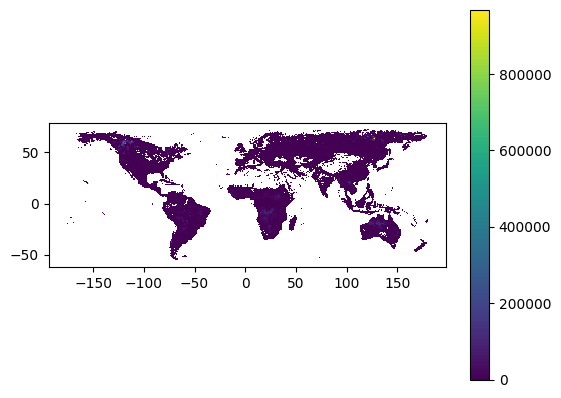

In [21]:
# grid_gdf_filtered.plot(column="sum_frp_above_95", legend=True)
# plt.show()

In [17]:
# grid_gdf_2023 = grid_gdf[grid_gdf["year"] == 2023]

##                                              SPATIAL ANALYSIS

# FRP Trend Analysis: @ 95 %tile Grid Wise ----> SUM
1. R2 
2. Pvalue
3. Beta
4. Tau

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Load the point shapefile and grid shapefile
points_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.shp")
grid_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/1D_Grid_globe.shp")

# Ensure both shapefiles have the same CRS
points_gdf = points_gdf.to_crs(epsg=4326)
grid_gdf = grid_gdf.to_crs(epsg=4326)

# Fix invalid geometries if present
grid_gdf = grid_gdf[grid_gdf.is_valid]
points_gdf = points_gdf[points_gdf.is_valid]

# Perform spatial join
joined_gdf = gpd.sjoin(grid_gdf, points_gdf, how="inner", predicate="intersects")

# Calculate the 95th percentile of FRP for each grid cell and year
percentile_values = (
    joined_gdf.groupby(["id", "year"])
    .agg(percentile_95_frp=("frp", lambda x: np.percentile(x.dropna(), 95)))
    .reset_index()
)

# Merge percentile values back to the main data
joined_gdf = joined_gdf.merge(percentile_values, on=["id", "year"], how="left")

# Filter for points with FRP above the 95th percentile within each grid cell and year
filtered_points = joined_gdf[joined_gdf["frp"] >= joined_gdf["percentile_95_frp"]]

# Calculate the sum of FRP above the 95th percentile for each grid cell and year
sum_values = (
    filtered_points.groupby(["id", "year"])
    .agg(sum_frp_above_95=("frp", "sum"))
    .reset_index()
)

# Merge yearly FRP sums back to grid shapefile
grid_gdf = grid_gdf.merge(sum_values, on="id", how="left")

# Calculate R², p-value, Tau, and beta for each grid cell across years
results = []

for grid_id, group in sum_values.groupby("id"):
    if len(group) > 1:  # Ensure there is more than one year for regression
        slope, intercept, r_value, p_value, std_err = linregress(group["year"], group["sum_frp_above_95"])
        
        # Append results for each grid cell
        results.append({
            "id": grid_id,
            "beta": slope,
            "R_squared": r_value**2,
            "p_value": p_value,
            "Tau": np.mean(group["sum_frp_above_95"])  # Replace with the appropriate Tau calculation if different
        })

# Convert results to DataFrame
trend_df = pd.DataFrame(results)

# Merge trend results with grid shapefile
grid_gdf = grid_gdf.merge(trend_df, on="id", how="left")

# Filter out grid cells with NaN values in 'sum_frp_above_95'
grid_gdf_filtered = grid_gdf.dropna(subset=["sum_frp_above_95"])

# Save the result to a new shapefile with trend metrics
# grid_gdf.to_file("/Users/ceedindia/Documents/FIRE/Trend/1deg_Grid_FRP_SUM_Trend_Metrics.shp")

# Optional: Display the result
# print(grid_gdf_filtered[["id", "beta", "R_squared", "p_value", "Tau"]].head())
# Save the result to a new shapefile with trend metrics
# grid_gdf.to_file("/Users/ceedindia/Documents/FIRE/Trend/1deg_Grid_FRP_SUM_Trend_Metrics.shp")



In [2]:
grid_gdf_filtered

,id,left,top,right,bottom,row_index,col_index,geometry,year,sum_frp_above_95,beta,R_squared,p_value,Tau
791,792.0,-175.999989,-19.376875,-174.999989,-20.376875,103.0,4.0,"POLYGON ((-175.99999 -19.37687, -174.99999 -19...",2021.0,24.7,NaN,NaN,NaN,NaN
1301,1302.0,-172.999989,-13.376875,-171.999989,-14.376875,97.0,7.0,"POLYGON ((-172.99999 -13.37687, -171.99999 -13...",2003.0,87.9,-7.028571,0.260960,0.489157,77.450000
1302,1302.0,-172.999989,-13.376875,-171.999989,-14.376875,97.0,7.0,"POLYGON ((-172.99999 -13.37687, -171.99999 -13...",2008.0,151.8,-7.028571,0.260960,0.489157,77.450000
1303,1302.0,-172.999989,-13.376875,-171.999989,-14.376875,97.0,7.0,"POLYGON ((-172.99999 -13.37687, -171.99999 -13...",2011.0,30.4,-7.028571,0.260960,0.489157,77.450000
1304,1302.0,-172.999989,-13.376875,-171.999989,-14.376875,97.0,7.0,"POLYGON ((-172.99999 -13.37687, -171.99999 -13...",2012.0,39.7,-7.028571,0.260960,0.489157,77.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220973,61849.0,179.000011,-16.376875,180.000011,-17.376875,100.0,359.0,"POLYGON ((179.00001 -16.37687, 180.00001 -16.3...",2019.0,29.5,-0.685599,0.006538,0.774525,60.920000
220974,61849.0,179.000011,-16.376875,180.000011,-17.376875,100.0,359.0,"POLYGON ((179.00001 -16.37687, 180.00001 -16.3...",2023.0,41.6,-0.685599,0.006538,0.774525,60.920000
220975,61850.0,179.000011,-17.376875,180.000011,-18.376875,101.0,359.0,"POLYGON ((179.00001 -17.37687, 180.00001 -17.3...",2003.0,46.3,-2.166187,0.948518,0.145716,31.833333
220976,61850.0,179.000011,-17.376875,180.000011,-18.376875,101.0,359.0,"POLYGON ((179.00001 -17.37687, 180.00001 -17.3...",2006.0,33.1,-2.166187,0.948518,0.145716,31.833333


In [9]:
# Filter the DataFrame to only include rows with p_value < 0.05
grid_gdf_filtered = grid_gdf_filtered[grid_gdf_filtered['p_value'] < 0.05]

# Optional: Display the filtered result
print(grid_gdf_filtered)

             id        left        top       right     bottom  row_index  \
2779     2773.0 -163.999989  63.623125 -162.999989  62.623125       20.0   
2780     2773.0 -163.999989  63.623125 -162.999989  62.623125       20.0   
2781     2774.0 -163.999989  62.623125 -162.999989  61.623125       21.0   
2782     2774.0 -163.999989  62.623125 -162.999989  61.623125       21.0   
2787     2776.0 -163.999989  60.623125 -162.999989  59.623125       23.0   
...         ...         ...        ...         ...        ...        ...   
220654  61594.0  178.000011  66.623125  179.000011  65.623125       17.0   
220773  61679.0  178.000011 -18.376875  179.000011 -19.376875      102.0   
220774  61679.0  178.000011 -18.376875  179.000011 -19.376875      102.0   
220793  61698.0  178.000011 -37.376875  179.000011 -38.376875      121.0   
220794  61698.0  178.000011 -37.376875  179.000011 -38.376875      121.0   

        col_index                                           geometry    year  \
2779   

In [3]:
# Calculate min and max of the 'beta' column
beta_min = grid_gdf_filtered["sum_frp_above_95"].min()
beta_max = grid_gdf_filtered["sum_frp_above_95"].max()

print("Minimum beta value:", beta_min)
print("Maximum beta value:", beta_max)

Minimum beta value: 0.0
Maximum beta value: 968279.1


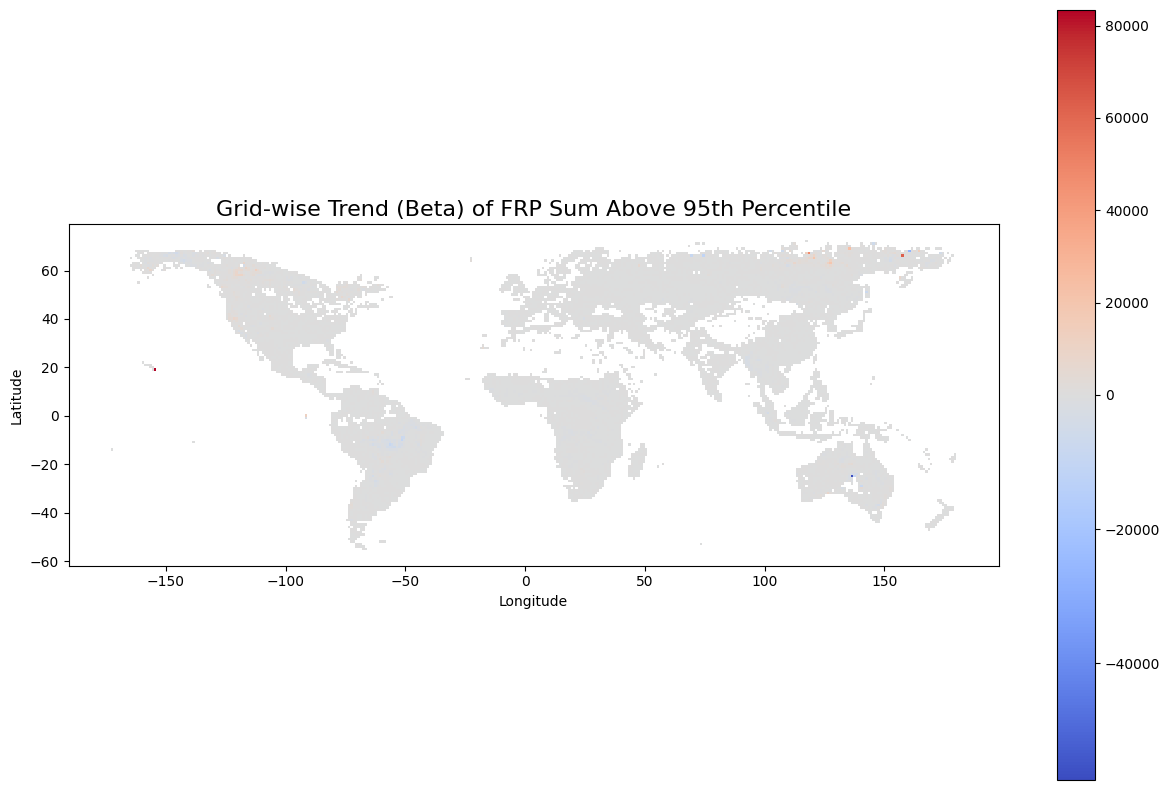

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define a diverging color map using calculated min and max
cmap = plt.cm.coolwarm
norm = mcolors.TwoSlopeNorm(vmin=beta_min, vcenter=0, vmax=beta_max)

# Plot the map with updated color scale
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
grid_gdf_filtered.plot(column="beta", cmap=cmap, norm=norm, legend=True, ax=ax)

# Add title and axis labels
ax.set_title("Grid-wise Trend (Beta) of FRP Sum Above 95th Percentile", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

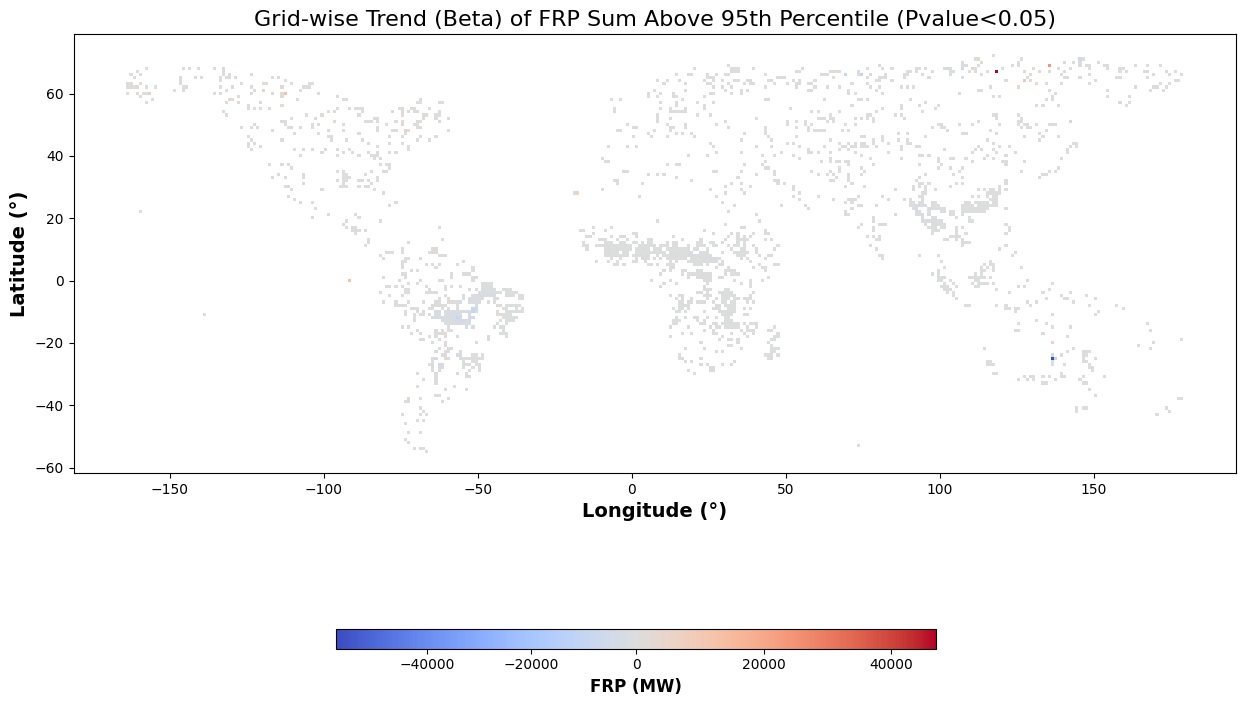

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mapclassify
import numpy as np

# Calculate the 5th and 95th percentiles for beta
# beta_5th = grid_gdf_filtered["beta"]#.quantile(0.05)
# beta_95th = grid_gdf_filtered["beta"]#.quantile(0.95)

# Define a diverging color map using quantile-based vmin and vmax
cmap = plt.cm.coolwarm
norm = mcolors.TwoSlopeNorm(vmin=beta_min, vcenter=0, vmax=beta_max)

# Plot the map without the default legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
grid_gdf_filtered.plot(column="beta", cmap=cmap, norm=norm, ax=ax, legend=False)

# Create an axis for the color bar below the plot
cax = fig.add_axes([0.3, 0.1, 0.4, 0.02])  # [left, bottom, width, height] for color bar position
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Dummy array for ScalarMappable
cbar = fig.colorbar(sm, cax=cax, orientation="horizontal")
cbar.set_label("FRP (MW)", fontsize=12, fontweight="bold")  # Label for the color bar

# Add title and bold labels with degree symbols
ax.set_title("Grid-wise Trend (Beta) of FRP Sum Above 95th Percentile (Pvalue<0.05)", fontsize=16)
ax.set_xlabel("Longitude (°)", fontsize=14, fontweight="bold")
ax.set_ylabel("Latitude (°)", fontsize=14, fontweight="bold")

plt.show()

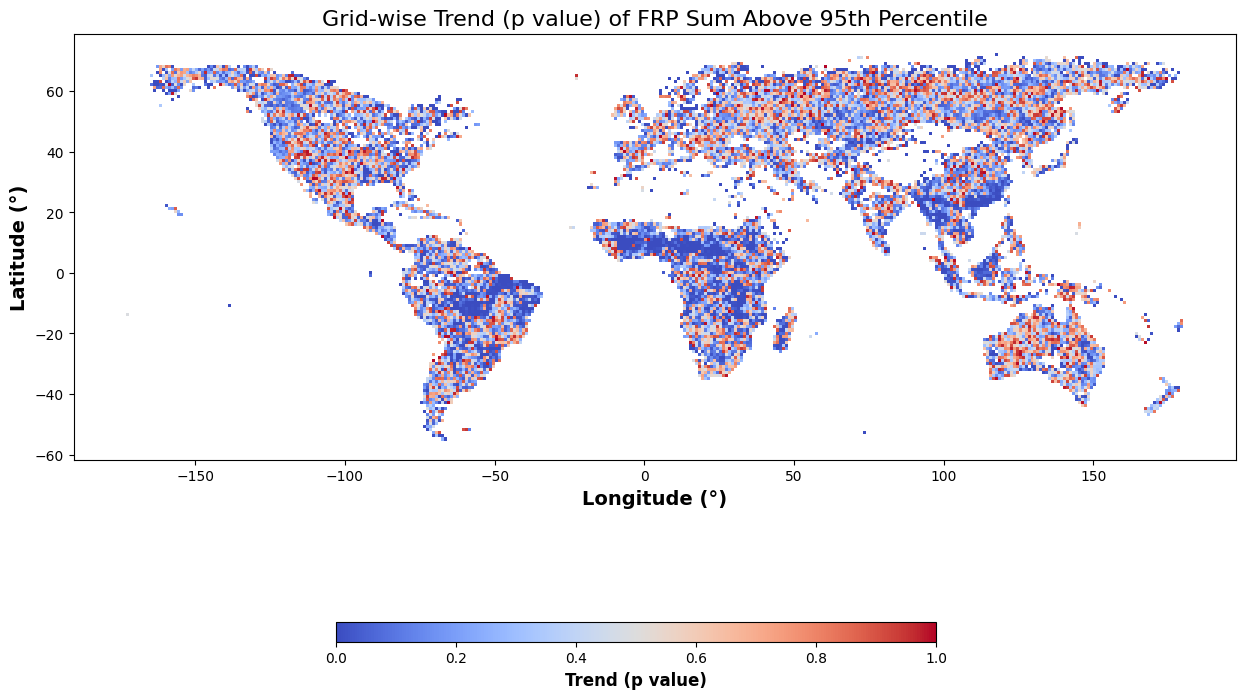

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define a diverging color map with vmin and vmax set to 0 and 1
cmap = plt.cm.coolwarm
norm = mcolors.Normalize(vmin=0, vmax=1)

# Plot the map without the default legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
grid_gdf_filtered.plot(column="p_value", cmap=cmap, norm=norm, ax=ax, legend=False)

# Create an axis for the color bar below the plot
cax = fig.add_axes([0.3, 0.1, 0.4, 0.02])  # [left, bottom, width, height] for color bar position
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Dummy array for ScalarMappable
cbar = fig.colorbar(sm, cax=cax, orientation="horizontal")
cbar.set_label("Trend (p value)", fontsize=12, fontweight="bold")  # Label for the color bar

# Add title and bold labels with degree symbols
ax.set_title("Grid-wise Trend (p value) of FRP Sum Above 95th Percentile", fontsize=16)
ax.set_xlabel("Longitude (°)", fontsize=14, fontweight="bold")
ax.set_ylabel("Latitude (°)", fontsize=14, fontweight="bold")

plt.show()

# FRP Trend Analysis: @ 95 %tile Grid Wise ----> MEAN
1. R2 
2. Pvalue
3. Beta
4. Tau

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Load the point shapefile and grid shapefile
points_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.shp")
grid_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/1D_Grid_globe.shp")

# Ensure both shapefiles have the same CRS
points_gdf = points_gdf.to_crs(epsg=4326)
grid_gdf = grid_gdf.to_crs(epsg=4326)

# Fix invalid geometries if present
grid_gdf = grid_gdf[grid_gdf.is_valid]
points_gdf = points_gdf[points_gdf.is_valid]

# Perform spatial join
joined_gdf = gpd.sjoin(grid_gdf, points_gdf, how="inner", predicate="intersects")

# Calculate the 95th percentile of FRP for each grid cell and year
percentile_values = (
    joined_gdf.groupby(["id", "year"])
    .agg(percentile_95_frp=("frp", lambda x: np.percentile(x.dropna(), 95)))
    .reset_index()
)

# Merge percentile values back to the main data
joined_gdf = joined_gdf.merge(percentile_values, on=["id", "year"], how="left")

# Filter for points with FRP above the 95th percentile within each grid cell and year
filtered_points = joined_gdf[joined_gdf["frp"] >= joined_gdf["percentile_95_frp"]]

# Calculate the mean of FRP above the 95th percentile for each grid cell and year
mean_values = (
    filtered_points.groupby(["id", "year"])
    .agg(mean_frp_above_95=("frp", "mean"))
    .reset_index()
)

# Merge yearly FRP means back to grid shapefile
grid_gdf = grid_gdf.merge(mean_values, on="id", how="left")

# Calculate R², p-value, Tau, and beta for each grid cell across years
results = []

for grid_id, group in mean_values.groupby("id"):
    if len(group) > 1:  # Ensure there is more than one year for regression
        slope, intercept, r_value, p_value, std_err = linregress(group["year"], group["mean_frp_above_95"])
        
        # Append results for each grid cell
        results.append({
            "id": grid_id,
            "beta": slope,
            "R_squared": r_value**2,
            "p_value": p_value,
            "Tau": np.mean(group["mean_frp_above_95"])  # Replace with the appropriate Tau calculation if different
        })

# Convert results to DataFrame
trend_df = pd.DataFrame(results)

# Merge trend results with grid shapefile
grid_gdf = grid_gdf.merge(trend_df, on="id", how="left")

# Filter out grid cells with NaN values in 'mean_frp_above_95'
grid_gdf_filtered = grid_gdf.dropna(subset=["mean_frp_above_95"])



In [8]:
# Calculate min and max of the 'beta' column
frp_min = grid_gdf_filtered["mean_frp_above_95"].min()
frp_max = grid_gdf_filtered["mean_frp_above_95"].max()

print("Minimum beta value:", frp_min)
print("Maximum beta value:", frp_max)

Minimum beta value: 0.0
Maximum beta value: 10548.0


In [3]:
grid_gdf_filtered

,id,left,top,right,bottom,row_index,col_index,geometry,year,mean_frp_above_95,beta,R_squared,p_value,Tau
791,792.0,-175.999989,-19.376875,-174.999989,-20.376875,103.0,4.0,"POLYGON ((-175.99999 -19.37687, -174.99999 -19...",2021.0,24.7,NaN,NaN,NaN,NaN
1301,1302.0,-172.999989,-13.376875,-171.999989,-14.376875,97.0,7.0,"POLYGON ((-172.99999 -13.37687, -171.99999 -13...",2003.0,87.9,-7.028571,0.260960,0.489157,77.450000
1302,1302.0,-172.999989,-13.376875,-171.999989,-14.376875,97.0,7.0,"POLYGON ((-172.99999 -13.37687, -171.99999 -13...",2008.0,151.8,-7.028571,0.260960,0.489157,77.450000
1303,1302.0,-172.999989,-13.376875,-171.999989,-14.376875,97.0,7.0,"POLYGON ((-172.99999 -13.37687, -171.99999 -13...",2011.0,30.4,-7.028571,0.260960,0.489157,77.450000
1304,1302.0,-172.999989,-13.376875,-171.999989,-14.376875,97.0,7.0,"POLYGON ((-172.99999 -13.37687, -171.99999 -13...",2012.0,39.7,-7.028571,0.260960,0.489157,77.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220973,61849.0,179.000011,-16.376875,180.000011,-17.376875,100.0,359.0,"POLYGON ((179.00001 -16.37687, 180.00001 -16.3...",2019.0,29.5,-1.095202,0.035772,0.499612,54.063333
220974,61849.0,179.000011,-16.376875,180.000011,-17.376875,100.0,359.0,"POLYGON ((179.00001 -16.37687, 180.00001 -16.3...",2023.0,41.6,-1.095202,0.035772,0.499612,54.063333
220975,61850.0,179.000011,-17.376875,180.000011,-18.376875,101.0,359.0,"POLYGON ((179.00001 -17.37687, 180.00001 -17.3...",2003.0,46.3,-2.166187,0.948518,0.145716,31.833333
220976,61850.0,179.000011,-17.376875,180.000011,-18.376875,101.0,359.0,"POLYGON ((179.00001 -17.37687, 180.00001 -17.3...",2006.0,33.1,-2.166187,0.948518,0.145716,31.833333


In [2]:
# Save the result to a new shapefile with trend metrics
grid_gdf_filtered.to_file("/Users/ceedindia/Documents/FIRE/Trend/1deg_Grid_FRP_Trend_Metrics_Mean.shp")
# grid_gdf_filtered
# Optional: Display the result
# print(grid_gdf_filtered[["id", "beta", "R_squared", "p_value", "Tau"]].head())

/var/folders/5z/fpt8svs529xd3v8ldt1pttgw0000gn/T/ipykernel_36006/2660300666.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  grid_gdf_filtered.to_file("/Users/ceedindia/Documents/FIRE/Trend/1deg_Grid_FRP_Trend_Metrics_Mean.shp")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'mean_frp_above_95' to 'mean_frp_a'
  ogr_write(


#  p-value less than 0.05 (representing a 95% confidence level)

In [2]:
# Filter the DataFrame to only include rows with p_value < 0.05
grid_gdf_filtered_95_conf = grid_gdf_filtered[grid_gdf_filtered['p_value'] < 0.05]

# Optional: Display the filtered result
print(grid_gdf_filtered_95_conf)

             id        left        top       right     bottom  row_index  \
2779     2773.0 -163.999989  63.623125 -162.999989  62.623125       20.0   
2780     2773.0 -163.999989  63.623125 -162.999989  62.623125       20.0   
2781     2774.0 -163.999989  62.623125 -162.999989  61.623125       21.0   
2782     2774.0 -163.999989  62.623125 -162.999989  61.623125       21.0   
2787     2776.0 -163.999989  60.623125 -162.999989  59.623125       23.0   
...         ...         ...        ...         ...        ...        ...   
220654  61594.0  178.000011  66.623125  179.000011  65.623125       17.0   
220773  61679.0  178.000011 -18.376875  179.000011 -19.376875      102.0   
220774  61679.0  178.000011 -18.376875  179.000011 -19.376875      102.0   
220793  61698.0  178.000011 -37.376875  179.000011 -38.376875      121.0   
220794  61698.0  178.000011 -37.376875  179.000011 -38.376875      121.0   

        col_index                                           geometry    year  \
2779   

In [2]:
# import pandas as pd

# # Replace 'grid_gdf_filtered' with the actual dataframe variable
# yearly_counts = grid_gdf_filtered['year'].value_counts().sort_index()
# # 
# # Display the result
# print(yearly_counts)

year
2003.0    8508
2004.0    8067
2005.0    8338
2006.0    8377
2007.0    8155
2008.0    8061
2009.0    8097
2010.0    8096
2011.0    8314
2012.0    8584
2013.0    8238
2014.0    8136
2015.0    8236
2016.0    8044
2017.0    8150
2018.0    8157
2019.0    8293
2020.0    8096
2021.0    8044
2022.0    7807
2023.0    8188
Name: count, dtype: int64


In [3]:
# Calculate min and max of the 'beta' column
beta_min = grid_gdf_filtered_95_conf["beta"].min()
beta_max = grid_gdf_filtered_95_conf["beta"].max()

print("Minimum beta value:", beta_min)
print("Maximum beta value:", beta_max)

Minimum beta value: -1503.6
Maximum beta value: 1648.6


In [4]:
# Calculate min and max of the 'beta' column
p_value_min = grid_gdf_filtered_95_conf["p_value"].min()
p_value_max = grid_gdf_filtered_95_conf["p_value"].max()

print("Minimum P value:", p_value_min)
print("Maximum P value:", p_value_max)

Minimum P value: 0.0
Maximum P value: 0.04999873468189264


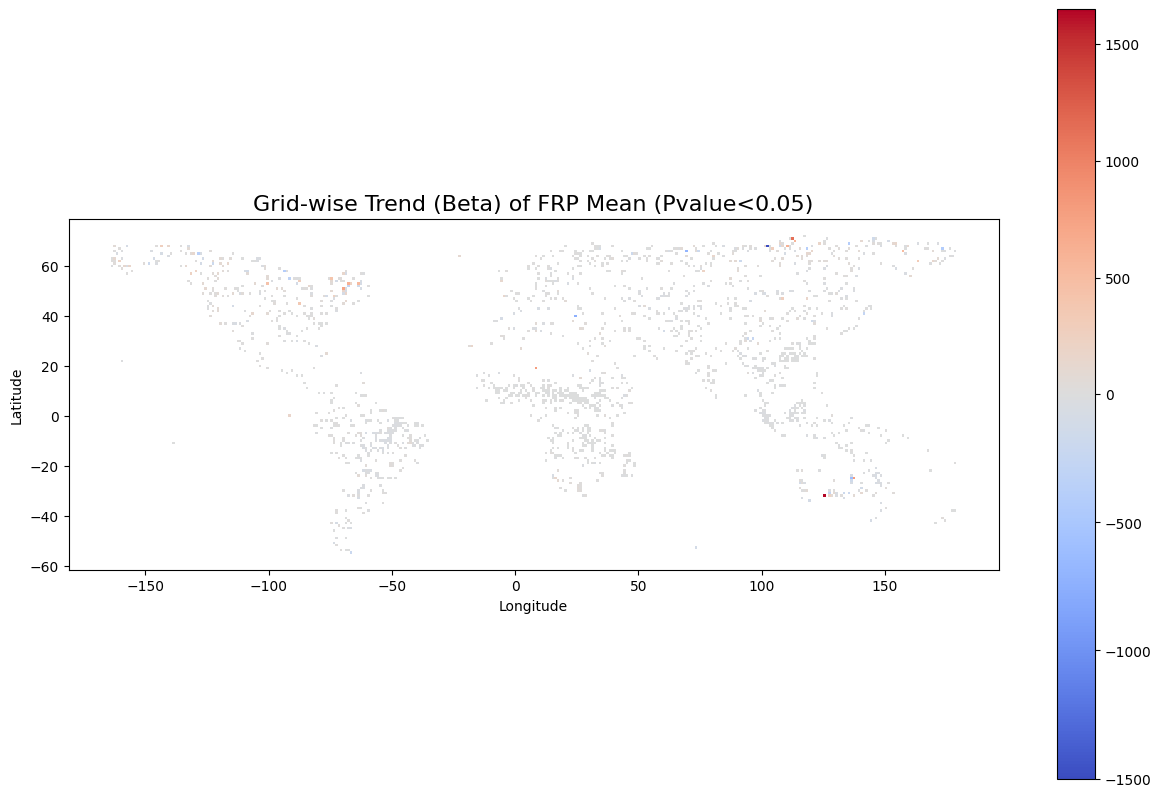

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define a diverging color map using calculated min and max
cmap = plt.cm.coolwarm
norm = mcolors.TwoSlopeNorm(vmin=beta_min, vcenter=0, vmax=beta_max)

# Plot the map with updated color scale
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
grid_gdf_filtered_95_conf.plot(column="beta", cmap=cmap, norm=norm, legend=True, ax=ax)

# Add title and axis labels
ax.set_title("Grid-wise Trend (Beta) of FRP Mean (Pvalue<0.05)", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

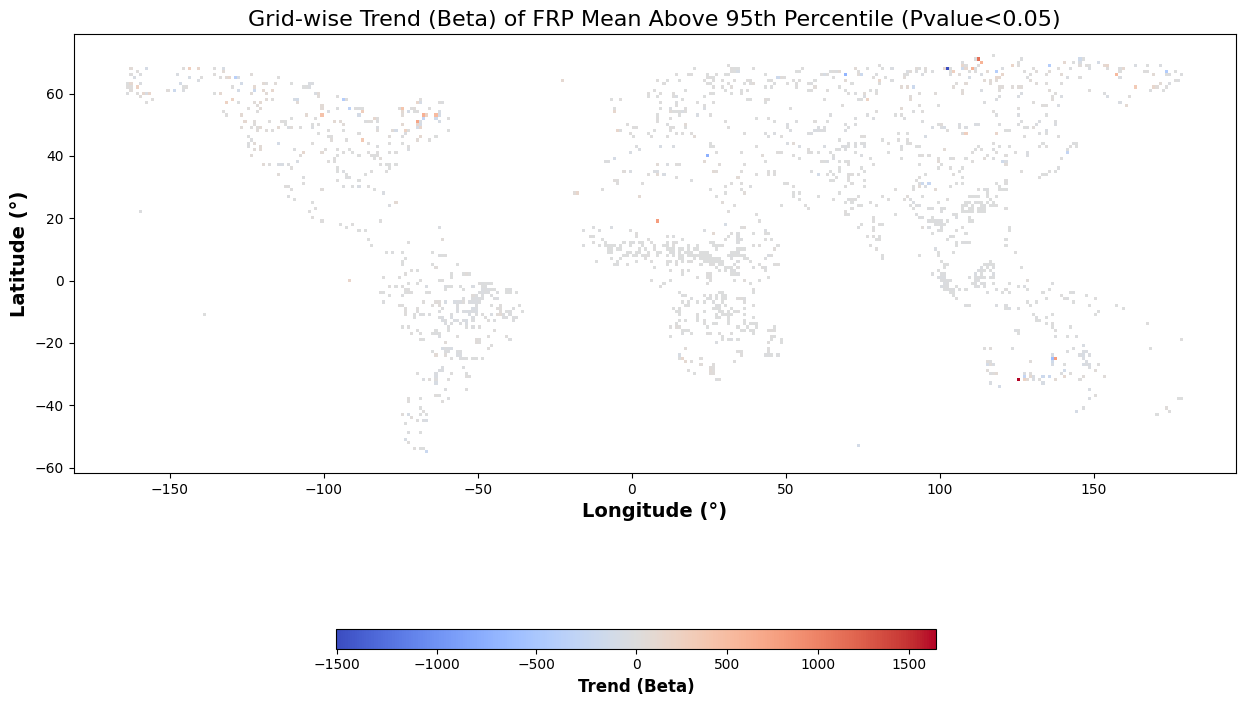

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mapclassify
import numpy as np

# Calculate the 5th and 95th percentiles for beta
# beta_5th = grid_gdf_filtered_95_conf["beta"].quantile(0.05)
# beta_95th = grid_gdf_filtered_95_conf["beta"].quantile(0.95)

# Define a diverging color map using quantile-based vmin and vmax
cmap = plt.cm.coolwarm
norm = mcolors.TwoSlopeNorm(vmin=beta_min, vcenter=0, vmax=beta_max)

# Plot the map without the default legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
grid_gdf_filtered_95_conf.plot(column="beta", cmap=cmap, norm=norm, ax=ax, legend=False)

# Create an axis for the color bar below the plot
cax = fig.add_axes([0.3, 0.1, 0.4, 0.02])  # [left, bottom, width, height] for color bar position
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Dummy array for ScalarMappable
cbar = fig.colorbar(sm, cax=cax, orientation="horizontal")
cbar.set_label("FRP (MW)", fontsize=12, fontweight="bold")  # Label for the color bar

# Add title and bold labels with degree symbols
ax.set_title("Grid-wise Trend (Beta) of FRP Mean Above 95th Percentile (Pvalue<0.05)", fontsize=16)
ax.set_xlabel("Longitude (°)", fontsize=14, fontweight="bold")
ax.set_ylabel("Latitude (°)", fontsize=14, fontweight="bold")

plt.show()

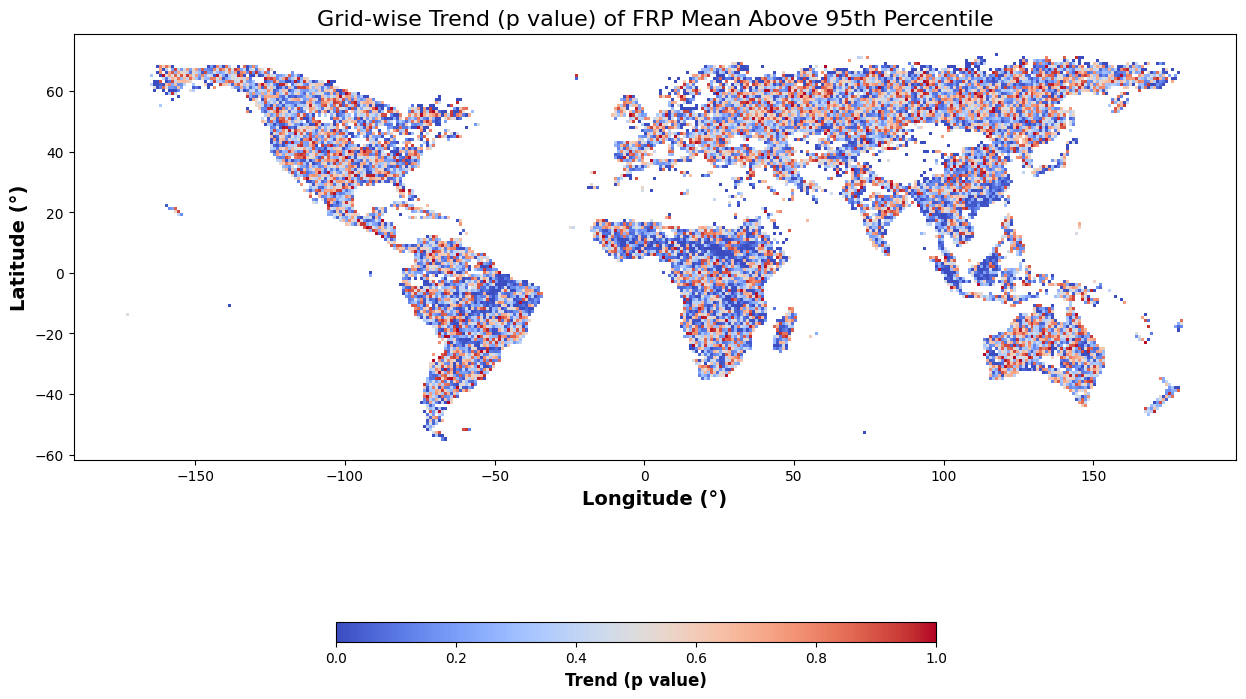

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define a diverging color map with vmin and vmax set to 0 and 1
cmap = plt.cm.coolwarm
norm = mcolors.Normalize(vmin=0, vmax=1)

# Plot the map without the default legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
grid_gdf_filtered.plot(column="p_value", cmap=cmap, norm=norm, ax=ax, legend=False)

# Create an axis for the color bar below the plot
cax = fig.add_axes([0.3, 0.1, 0.4, 0.02])  # [left, bottom, width, height] for color bar position
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Dummy array for ScalarMappable
cbar = fig.colorbar(sm, cax=cax, orientation="horizontal")
cbar.set_label("Trend (p value)", fontsize=12, fontweight="bold")  # Label for the color bar

# Add title and bold labels with degree symbols
ax.set_title("Grid-wise Trend (p value) of FRP Mean Above 95th Percentile", fontsize=16)
ax.set_xlabel("Longitude (°)", fontsize=14, fontweight="bold")
ax.set_ylabel("Latitude (°)", fontsize=14, fontweight="bold")

plt.show()

## Extracting and Saving 95th Percentile FRP Points for Each Grid Cell

This code filters and extracts FRP points that fall above the 95th percentile within each grid cell and saves the result as a new shapefile.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

# Load the point shapefile and grid shapefile
points_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Final_FRP_filtered_New.shp")
grid_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/1D_Grid_globe.shp")

# Ensure both shapefiles have the same CRS
points_gdf = points_gdf.to_crs(epsg=4326)
grid_gdf = grid_gdf.to_crs(epsg=4326)

# Fix invalid geometries if present
grid_gdf = grid_gdf[grid_gdf.is_valid]
points_gdf = points_gdf[points_gdf.is_valid]

# Perform spatial join to associate each FRP point with a grid cell
joined_gdf = gpd.sjoin(grid_gdf, points_gdf, how="inner", predicate="intersects")

# Calculate the 95th percentile of FRP for each grid cell
percentile_values = (
    joined_gdf.groupby("id")
    .agg(percentile_95_frp=("frp", lambda x: np.percentile(x.dropna(), 95)))
    .reset_index()
)

# Merge 95th percentile FRP values back to the joined dataframe
joined_gdf = joined_gdf.merge(percentile_values, on="id", how="left")

# Filter for FRP points that are above the 95th percentile within each grid cell
filtered_points = joined_gdf[joined_gdf["frp"] >= joined_gdf["percentile_95_frp"]]

# Save the filtered points (95th percentile FRP points) to a new shapefile
# filtered_points.to_file("/Users/ceedindia/Documents/FIRE/FRP_95th_Percentile_Points.shp")

# Optional: Display the result for verification
filtered_points.head()

,id,left,top,right,bottom,row_index,col_index,geometry,index_right,latitude,...,bright_t31,frp,daynight,type,Unnamed_ 0,year,LULC_Class,Biome,Tau,percentile_95_frp
3,792.0,-175.999989,-19.376875,-174.999989,-20.376875,103.0,4.0,"POLYGON ((-175.99999 -19.37687, -174.99999 -19...",22007054,-19.7259,...,289.9,24.7,N,1.0,NaN,2021,1.0,1.0,NaN,23.320
11,1302.0,-172.999989,-13.376875,-171.999989,-14.376875,97.0,7.0,"POLYGON ((-172.99999 -13.37687, -171.99999 -13...",7511671,-13.5603,...,306.0,151.8,D,0.0,NaN,2008,1.0,1.0,NaN,134.805
19,1474.0,-171.999989,-13.376875,-170.999989,-14.376875,97.0,8.0,"POLYGON ((-171.99999 -13.37687, -170.99999 -13...",10966413,-13.9061,...,300.8,23.7,D,0.0,NaN,2011,1.0,1.0,NaN,23.700
20,1823.0,-169.999989,-18.376875,-168.999989,-19.376875,102.0,10.0,"POLYGON ((-169.99999 -18.37687, -168.99999 -18...",1618095,-19.1169,...,296.0,33.6,D,0.0,NaN,2004,1.0,1.0,NaN,33.265
25,2252.0,-166.999989,68.623125,-165.999989,67.623125,15.0,13.0,"POLYGON ((-166.99999 68.62313, -165.99999 68.6...",18768640,68.3411,...,293.8,114.2,D,0.0,NaN,2018,1.0,11.0,4.0,110.915


/var/folders/5z/fpt8svs529xd3v8ldt1pttgw0000gn/T/ipykernel_40140/804134616.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_points['latitude'] = filtered_points['geometry'].centroid.y
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


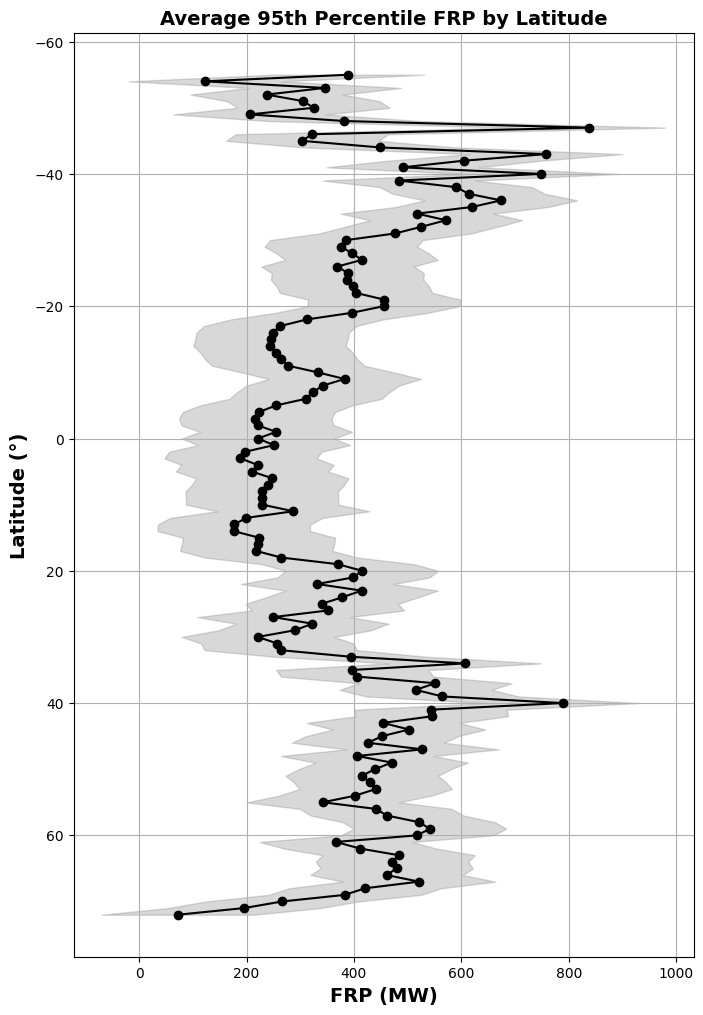

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming filtered_points is the DataFrame with the `percentile_95_frp` values and geometries

# Extract latitude from the geometry's centroid
filtered_points['latitude'] = filtered_points['geometry'].centroid.y

# Group by latitude (you can round to an integer or a specific interval for grouping)
# Calculate the mean `percentile_95_frp` value for each latitude
latitude_frp = filtered_points.groupby(filtered_points['latitude'].round(0))['percentile_95_frp'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 12))
plt.plot(latitude_frp['percentile_95_frp'], latitude_frp['latitude'], 'o-', color='black', label='Average 95th Percentile FRP')
plt.fill_betweenx(latitude_frp['latitude'], 
                  latitude_frp['percentile_95_frp'] - latitude_frp['percentile_95_frp'].std(), 
                  latitude_frp['percentile_95_frp'] + latitude_frp['percentile_95_frp'].std(), 
                  color='gray', alpha=0.3)

# Add labels and title
plt.xlabel("FRP (MW)", fontsize=14, fontweight="bold")
plt.ylabel("Latitude (°)", fontsize=14, fontweight="bold")
plt.title("Average 95th Percentile FRP by Latitude", fontsize=14, fontweight="bold")
# plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to match the given plot style
plt.grid(True)

# Show the plot
plt.show()

/var/folders/5z/fpt8svs529xd3v8ldt1pttgw0000gn/T/ipykernel_40140/3590507102.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_points['latitude'] = filtered_points['geometry'].centroid.y
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


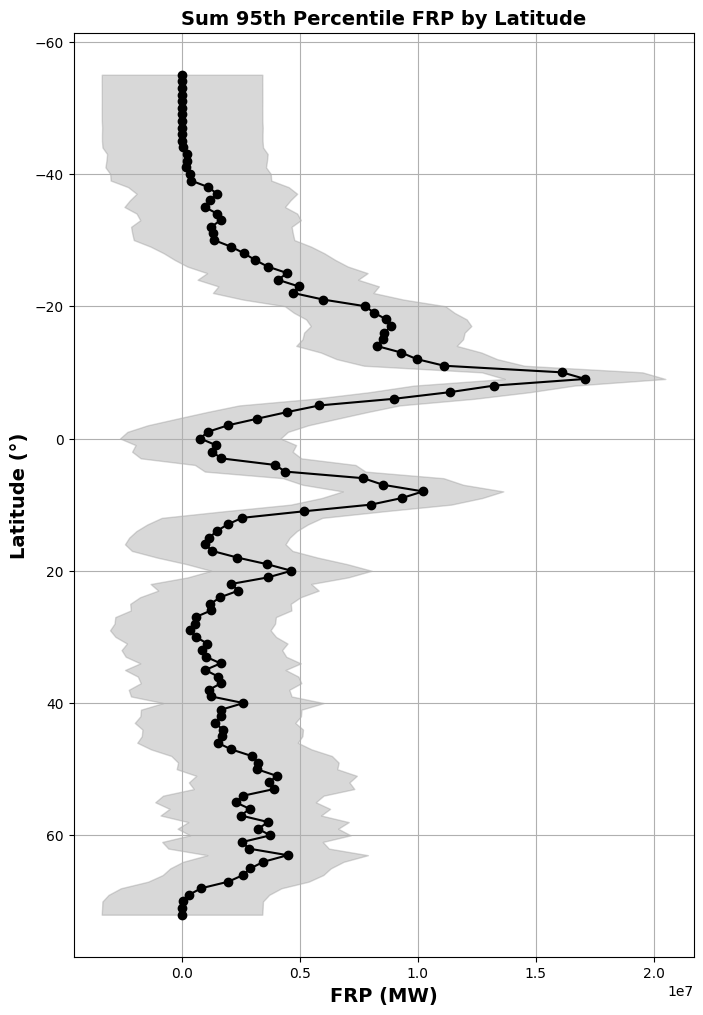

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming filtered_points is the DataFrame with the `percentile_95_frp` values and geometries

# Extract latitude from the geometry's centroid
filtered_points['latitude'] = filtered_points['geometry'].centroid.y

# Group by latitude (you can round to an integer or a specific interval for grouping)
# Calculate the mean `percentile_95_frp` value for each latitude
latitude_frp = filtered_points.groupby(filtered_points['latitude'].round(0))['percentile_95_frp'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 12))
plt.plot(latitude_frp['percentile_95_frp'], latitude_frp['latitude'], 'o-', color='black', label='Sum 95th Percentile FRP')
plt.fill_betweenx(latitude_frp['latitude'], 
                  latitude_frp['percentile_95_frp'] - latitude_frp['percentile_95_frp'].std(), 
                  latitude_frp['percentile_95_frp'] + latitude_frp['percentile_95_frp'].std(), 
                  color='gray', alpha=0.3)

# Add labels and title
plt.xlabel("FRP (MW)", fontsize=14, fontweight="bold")
plt.ylabel("Latitude (°)", fontsize=14, fontweight="bold")
plt.title("Sum 95th Percentile FRP by Latitude", fontsize=14, fontweight="bold")
# plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to match the given plot style
plt.grid(True)

# Show the plot
plt.show()

# NDVI Greening and Browning Analysis by Biome

This code performs the following tasks:

1. **Load Biome Shapefile**: Reads a shapefile of global biomes, each represented by a polygon, using `geopandas`.
2. **Initialize Result Lists**: Sets up lists to store the biome names and counts of greening and browning pixels for each biome.
3. **Open NDVI Raster File**: Loads an NDVI raster file containing global NDVI values, which indicates vegetation health.
4. **Loop Through Each Biome**: For each biome in the shapefile:
   - **Mask the Raster**: Masks the NDVI raster to isolate only the pixels within the current biome polygon.
   - **Flatten and Clean Data**: Flattens the NDVI data to a 1D array and removes any no-data values.
   - **Count Greening and Browning Pixels**: Counts pixels with NDVI values less than -0.25 as "browning" and values greater than 0.25 as "greening."
5. **Store Results**: Saves the biome name, browning count, and greening count into lists.
6. **Create a DataFrame**: Combines the results into a `DataFrame` with columns for biome names, browning pixels, and greening pixels.
7. **Display the Results**: Prints the final DataFrame, showing the greening and browning pixel counts for each biome.

This code helps analyze vegetation trends within different biomes based on NDVI values.

In [13]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import pandas as pd

# Load the biome shapefile
biomes_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Global_Biome.shp")

# Initialize lists to store results
biome_names = []
browning_counts = []
greening_counts = []

# Load the NDVI raster file
with rasterio.open("/Users/ceedindia/Documents/FIRE/Global_NDVI_Tau.tif") as src:
    # Loop over each biome polygon
    for idx, biome in biomes_gdf.iterrows():
        # Mask the raster with the current biome polygon
        out_image, out_transform = mask(src, [biome['geometry']], crop=True)
        out_image = out_image[0]  # Get the first band

        # Flatten the masked NDVI data to a 1D array
        out_image = out_image.flatten()
        
        # Remove no-data values (assuming nodata is set in raster metadata)
        out_image = out_image[out_image != src.nodata]

        # Count browning and greening pixels
        browning_count = np.sum(out_image < -0.25)
        greening_count = np.sum(out_image > 0.25)

        # Store the results
        biome_names.append(biome['BIOME_NAME'])
        browning_counts.append(browning_count)
        greening_counts.append(greening_count)

# Create a DataFrame with the results
biome_ndvi_trend_df = pd.DataFrame({
    'Biome': biome_names,
    'Browning_Pixels': browning_counts,
    'Greening_Pixels': greening_counts
})

# Display the result
print(biome_ndvi_trend_df)



                                                Biome  Browning_Pixels  \
0                 Temperate Broadleaf & Mixed Forests         13777585   
1                                           Mangroves           607553   
2      Tropical & Subtropical Moist Broadleaf Forests         23098346   
3         Temperate Grasslands, Savannas & Shrublands         23498437   
4           Tropical & Subtropical Coniferous Forests           527223   
5                       Flooded Grasslands & Savannas          2259128   
6                                Boreal Forests/Taiga         36939829   
7                     Montane Grasslands & Shrublands          3804524   
8                           Temperate Conifer Forests          8475922   
9                                              Tundra          7000214   
10  Tropical & Subtropical Grasslands, Savannas & ...         36700662   
11       Tropical & Subtropical Dry Broadleaf Forests          5573782   
12           Mediterranean Forests, Wo

In [14]:
# Optionally, save the result to a CSV file
biome_ndvi_trend_df.to_csv("/Users/ceedindia/Documents/FIRE/biome_ndvi_trend_summary_Green_Browning.csv", index=False)

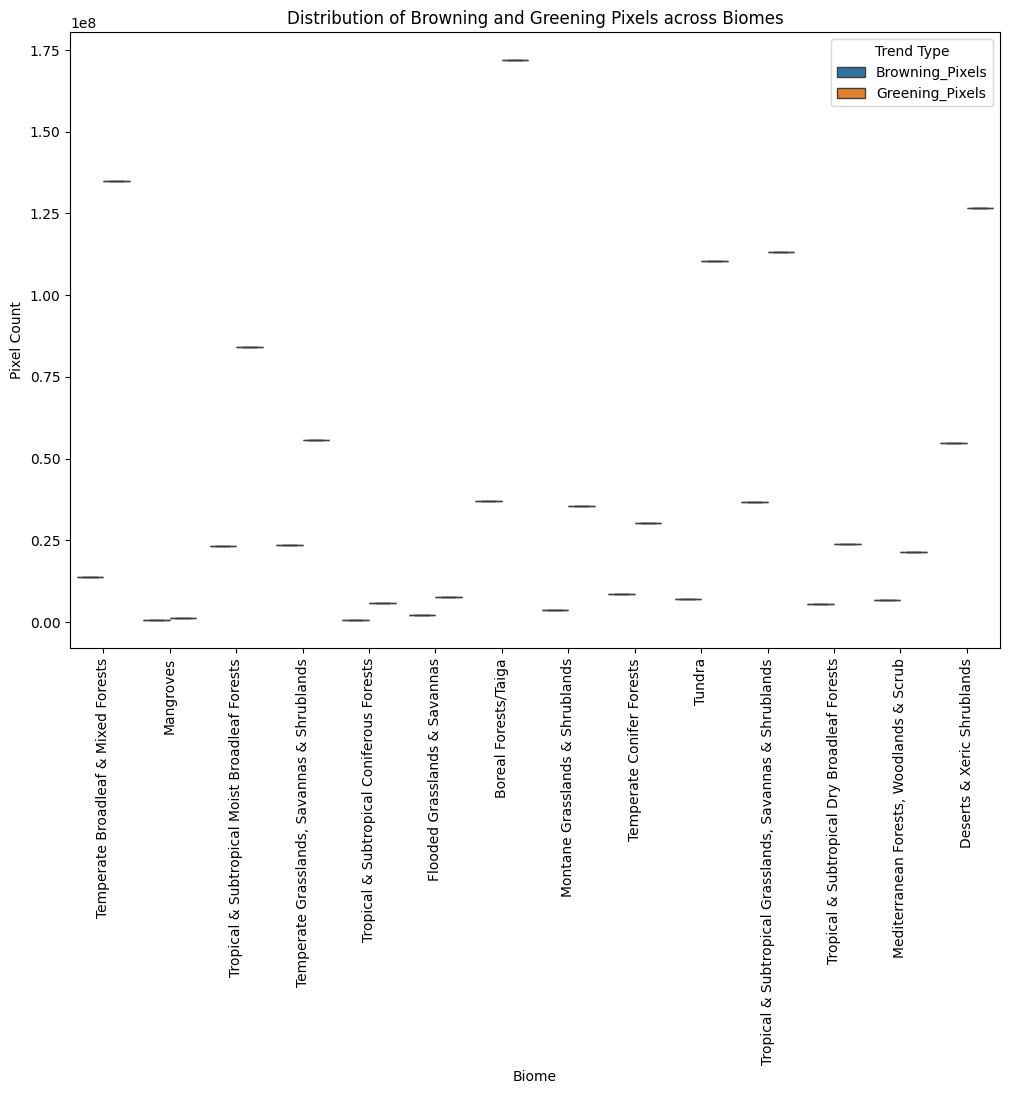

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file with biome data
file_path = '/Users/ceedindia/Documents/FIRE/biome_ndvi_trend_summary_Green_Browning.csv'
biome_ndvi_trend_df = pd.read_csv(file_path)

# Reshape the DataFrame to a long format suitable for seaborn
biome_long_df = pd.melt(
    biome_ndvi_trend_df,
    id_vars=['Biome'],
    value_vars=['Browning_Pixels', 'Greening_Pixels'],
    var_name='Trend_Type',
    value_name='Pixel_Count'
)

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=biome_long_df, x='Biome', y='Pixel_Count', hue='Trend_Type')

# Customize the plot
plt.title("Distribution of Browning and Greening Pixels across Biomes")
plt.xlabel("Biome")
plt.ylabel("Pixel Count")
plt.xticks(rotation=90)  # Rotate x labels for readability

# Display the plot
plt.legend(title="Trend Type")
plt.show()

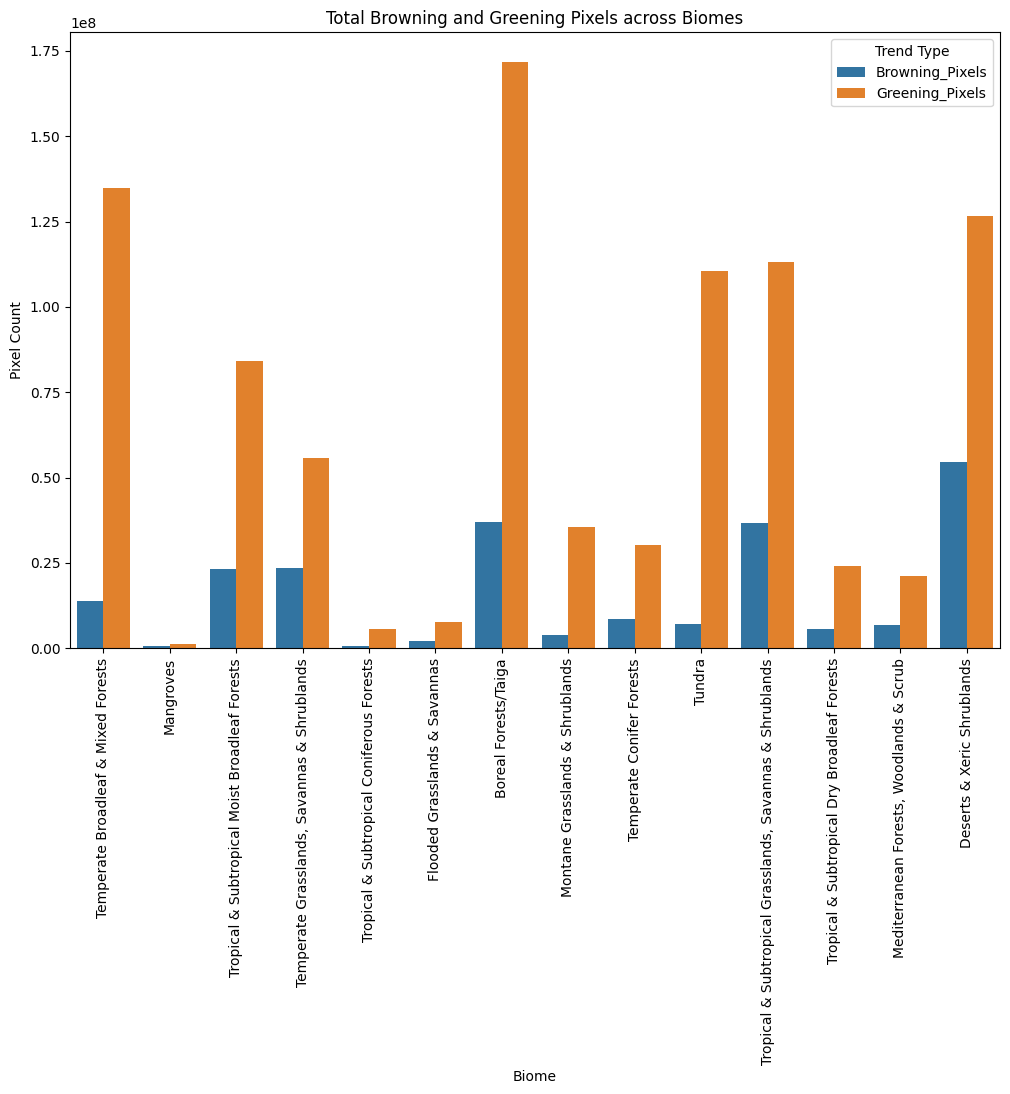

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file with biome data
file_path = '/Users/ceedindia/Documents/FIRE/biome_ndvi_trend_summary_Green_Browning.csv'
biome_ndvi_trend_df = pd.read_csv(file_path)

# Reshape the DataFrame to a long format suitable for seaborn
biome_long_df = pd.melt(
    biome_ndvi_trend_df,
    id_vars=['Biome'],
    value_vars=['Browning_Pixels', 'Greening_Pixels'],
    var_name='Trend_Type',
    value_name='Pixel_Count'
)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=biome_long_df, x='Biome', y='Pixel_Count', hue='Trend_Type')

# Customize the plot
plt.title("Total Browning and Greening Pixels across Biomes")
plt.xlabel("Biome")
plt.ylabel("Pixel Count")
plt.xticks(rotation=90)  # Rotate x labels for readability

# Display the plot
plt.legend(title="Trend Type")
plt.show()

# Zonal Mean NDVI Calculation by Grid Cell

This code performs the following tasks:

1. **Load the Grid Shapefile**: Reads a global grid shapefile (`1D_Grid_globe.shp`), where each polygon represents a grid cell, using `geopandas`.
2. **Load the NDVI Raster**: Loads a global NDVI raster (`Global_NDVI_Tau.tif`) using `rasterio`, assuming it has a single band.
3. **Initialize Progress Bar and Result List**: Uses `tqdm` to display a progress bar for processing each grid cell and initializes an empty list to store mean NDVI values for each grid cell.
4. **Calculate Zonal Statistics for Each Grid Cell**:
   - Loops through each grid cell geometry in the `grid` GeoDataFrame.
   - For each grid cell, calculates the mean NDVI value using `zonal_stats` from `rasterstats`, which computes the mean NDVI within that specific grid cell area.
   - Appends the mean NDVI value to the list `mean_ndvi_values`.
5. **Add Mean NDVI Values to the Grid DataFrame**: 
   - Adds a new column, `mean_ndvi`, to the `grid` DataFrame, which stores the calculated mean NDVI values for each grid cell.
6. **Optional: Save the Output**:
   - The code includes an optional section to save the modified grid with mean NDVI values to a new shapefile (`grid_with_mean_ndvi.shp`).

This code provides a spatial summary of NDVI by calculating the average NDVI within each grid cell, which is useful for understanding vegetation trends across different areas.

In [ ]:
# import geopandas as gpd
# import rasterio
# from rasterio.mask import mask
# import numpy as np
# import pandas as pd
# from tqdm import tqdm  # Import tqdm for the progress bar

# # Load the biome shapefile
# biomes_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Global_Biome.shp")

# # Initialize lists to store results
# biome_names = []
# browning_counts = []
# greening_counts = []
# total_counts = []

# # Load the NDVI raster file
# with rasterio.open("/Users/ceedindia/Documents/FIRE/Global_NDVI_Tau.tif") as src:
#     # Loop over each biome polygon with tqdm to show progress
#     for idx, biome in tqdm(biomes_gdf.iterrows(), total=biomes_gdf.shape[0], desc="Processing biomes"):
#         # Mask the raster with the current biome polygon
#         out_image, out_transform = mask(src, [biome['geometry']], crop=True)
#         out_image = out_image[0]  # Get the first band

#         # Flatten the masked NDVI data to a 1D array
#         out_image = out_image.flatten()
        
#         # Remove no-data values (assuming nodata is set in raster metadata)
#         out_image = out_image[out_image != src.nodata]

#         # Count browning, greening, and total pixels
#         browning_count = np.sum(out_image < -0.25)
#         greening_count = np.sum(out_image > 0.25)
#         total_count = len(out_image)

#         # Store the results
#         biome_names.append(biome['BIOME_NAME'])
#         browning_counts.append(browning_count)
#         greening_counts.append(greening_count)
#         total_counts.append(total_count)

# # Create a DataFrame with the results
# biome_ndvi_trend_df = pd.DataFrame({
#     'Biome': biome_names,
#     'Browning_Pixels': browning_counts,
#     'Greening_Pixels': greening_counts,
#     'Total_Pixels': total_counts
# })

# # Display the result
# print(biome_ndvi_trend_df)

# # Optionally, save the result to a CSV file
# # biome_ndvi_trend_df.to_csv("/path/to/biome_ndvi_trend_summary.csv", index=False)

In [18]:
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
from tqdm import tqdm  # for progress bar

# Load the grid shapefile
grid_file = "/Users/ceedindia/Documents/FIRE/1D_Grid_globe.shp"
grid = gpd.read_file(grid_file)

# Load the NDVI raster file
ndvi_raster = "/Users/ceedindia/Documents/FIRE/Global_NDVI_Tau.tif"
with rasterio.open(ndvi_raster) as src:
    affine = src.transform
    ndvi_array = src.read(1)  # Assuming single-band NDVI

# Initialize an empty list to store mean NDVI values with progress bar
mean_ndvi_values = []

# Calculate mean NDVI for each grid cell with progress bar
for zone in tqdm(grid.geometry, desc="Calculating zonal stats"):
    zonal_stat = zonal_stats(
        [zone],
        ndvi_raster,
        stats="mean",
        affine=affine,
        nodata=src.nodata
    )
    mean_ndvi_values.append(zonal_stat[0]["mean"])

# Add the mean NDVI results to the grid DataFrame
grid["mean_ndvi"] = mean_ndvi_values

# # Save the output to a new shapefile if needed 
# output_file = "/Users/ceedindia/Documents/FIRE/grid_with_mean_ndvi.shp"
# grid.to_file(output_file)

# print("Zonal stats completed and saved to:", output_file)

# # Save the output to a new shapefile if needed
output_file = "/Users/ceedindia/Documents/FIRE/grid_with_mean_ndvi.shp"
grid.to_file(output_file)

print("Zonal stats completed and saved to:", output_file)

Calculating zonal stats: 100%|██████████| 61920/61920 [1:06:51<00:00, 15.44it/s]


NameError: name 'output_file' is not defined

# Regression Analysis of NDVI vs FRP by Biome

This code performs the following tasks:

1. **Load the Shapefiles**:
   - Loads three shapefiles: 
     - `1deg_Grid_FRP_Trend_Metrics_Mean.shp`: Contains FRP trend data for grid cells.
     - `grid_with_mean_ndvi.shp`: Contains mean NDVI data for grid cells.
     - `Global_Biome.shp`: Contains biome polygons with associated biome names.

2. **Read the GeoDataFrames**:
   - Loads each shapefile into a `GeoDataFrame`: `FRP_Trend`, `TAU_Trend`, and `biomes_gdf` for FRP, NDVI, and biome data respectively.

3. **Merge FRP and NDVI Data**:
   - Merges `FRP_Trend` and `TAU_Trend` on the `id` column to bring the FRP trend metric (`beta`) and `mean_ndvi` values into a single DataFrame, `merged_df`.

4. **Spatial Join with Biomes**:
   - Performs a spatial join between the merged FRP-NDVI data and the biome data. This assigns each grid cell in `merged_df` to a biome based on its spatial location, adding biome information (`BIOME_NUM` and `BIOME_NAME`) to each grid cell in `merged_with_biomes`.

5. **Set Up Plot Grid**:
   - Determines the number of unique biomes and sets up a grid for plotting.
   - Defines a grid of subplots with 4 columns (`n_cols = 4`) and enough rows to fit all unique biomes.

6. **Plot Regression of NDVI vs FRP for Each Biome**:
   - Loops over each biome:
     - Filters `merged_with_biomes` to get data for the current biome.
     - Plots a scatter plot with a regression line using `seaborn.regplot`, where `mean_ndvi` is plotted on the x-axis and `beta` (FRP trend) on the y-axis.
     - Sets the title and labels for each subplot.
   
7. **Remove Empty Subplots**:
   - Removes any empty subplots if the total number of biomes is less than the grid capacity.

8. **Set Main Title**:
   - Adds a main title to the figure: "Regression Plots of NDVI vs FRP by Biome".

9. **Display the Plot**:
   - Displays the plot with all subplots arranged by biome, showing the relationship between NDVI and FRP for each biome.

This code provides a biome-by-biome view of the relationship between NDVI and FRP, with a regression line for each biome, to explore potential correlations in vegetation trends.

In [1]:
import geopandas as gpd

# Load the grid shapefile
FRP_file = "/Users/ceedindia/Documents/FIRE/Trend/1deg_Grid_FRP_Trend_Metrics_Mean.shp"
FRP_Trend = gpd.read_file(FRP_file)

# Load the grid shapefile
Tau_file = "/Users/ceedindia/Documents/FIRE/grid_with_mean_ndvi.shp"
TAU_Trend = gpd.read_file(Tau_file)

# Load the biome shapefile
biomes_gdf = gpd.read_file("/Users/ceedindia/Documents/FIRE/Global_Biome.shp")


In [2]:
# Display column names for each GeoDataFrame
print("FRP_Trend columns:", FRP_Trend.columns)
print("TAU_Trend columns:", TAU_Trend.columns)
print("biomes_gdf columns:", biomes_gdf.columns)

FRP_Trend columns: Index(['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index',
       'year', 'mean_frp_a', 'beta', 'R_squared', 'p_value', 'Tau',
       'geometry'],
      dtype='object')
TAU_Trend columns: Index(['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index',
       'mean_ndvi', 'geometry'],
      dtype='object')
biomes_gdf columns: Index(['OBJECTID', 'ECO_NAME', 'BIOME_NUM', 'BIOME_NAME', 'REALM',
       'ECO_BIOME_', 'NNH', 'ECO_ID', 'SHAPE_LENG', 'SHAPE_AREA', 'NNH_NAME',
       'COLOR', 'COLOR_BIO', 'COLOR_NNH', 'LICENSE', 'geometry'],
      dtype='object')


In [8]:
# Remove rows where 'mean_ndvi' is NaN
filtered_df = TAU_Trend.dropna(subset=['mean_ndvi'])

# Display the filtered DataFrame
print(filtered_df)

            id        left        top       right     bottom  row_index  \
203      204.0 -178.999989  52.623125 -177.999989  51.623125       31.0   
375      376.0 -177.999989  52.623125 -176.999989  51.623125       31.0   
376      377.0 -177.999989  51.623125 -176.999989  50.623125       32.0   
547      548.0 -176.999989  52.623125 -175.999989  51.623125       31.0   
548      549.0 -176.999989  51.623125 -175.999989  50.623125       32.0   
...        ...         ...        ...         ...        ...        ...   
61766  61767.0  179.000011  65.623125  180.000011  64.623125       18.0   
61768  61769.0  179.000011  63.623125  180.000011  62.623125       20.0   
61769  61770.0  179.000011  62.623125  180.000011  61.623125       21.0   
61779  61780.0  179.000011  52.623125  180.000011  51.623125       31.0   
61780  61781.0  179.000011  51.623125  180.000011  50.623125       32.0   

       col_index  mean_ndvi                                           geometry  
203          1.0  

In [10]:
biomes_gdf

,OBJECTID,ECO_NAME,BIOME_NUM,BIOME_NAME,REALM,ECO_BIOME_,NNH,ECO_ID,SHAPE_LENG,SHAPE_AREA,NNH_NAME,COLOR,COLOR_BIO,COLOR_NNH,LICENSE,geometry
0,17.0,Allegheny Highlands forests,4.0,Temperate Broadleaf & Mixed Forests,Nearctic,NE04,2,328,24.038587,7.958751,Nature Could Reach Half Protected,#C8EBB1,#00734C,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((146.37367 -43.74265, 146.373 -..."
1,23.0,Amazon-Orinoco-Southern Caribbean mangroves,14.0,Mangroves,Neotropic,NO14,1,611,139.824908,3.346216,Half Protected,#E600AA,#FE01C4,#257339,CC-BY 4.0,"MULTIPOLYGON (((29.1286 -31.94846, 29.12516 -3..."
2,2.0,Admiralty Islands lowland rain forests,1.0,Tropical & Subtropical Moist Broadleaf Forests,Australasia,AU01,2,135,4.800349,0.170599,Nature Could Reach Half Protected,#70A800,#38A700,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((-178.55769 -30.5453, -178.5641..."
3,6.0,Al-Hajar foothill xeric woodlands and shrublands,8.0,"Temperate Grasslands, Savannas & Shrublands",Palearctic,PA08,3,722,51.266965,4.099668,Nature Could Recover,#CA6634,#FEFF73,#F9A91B,CC-BY 4.0,"MULTIPOLYGON (((-69.28303 -52.59969, -69.27488..."
4,72.0,Bermuda subtropical conifer forests,3.0,Tropical & Subtropical Coniferous Forests,Nearctic,NE03,4,325,0.746025,0.003771,Nature Imperiled,#62A67D,#88CE66,#EE1E23,CC-BY 4.0,"MULTIPOLYGON (((101.2981 -2.21257, 101.2955 -2..."
5,25.0,Amur meadow steppe,9.0,Flooded Grasslands & Savannas,Palearctic,PA09,3,741,30.345317,15.118769,Nature Could Recover,#68BED9,#BEE7FF,#F9A91B,CC-BY 4.0,"MULTIPOLYGON (((-59.61587 -30.69104, -59.6306 ..."
6,11.0,Alaska Peninsula montane taiga,6.0,Boreal Forests/Taiga,Nearctic,NE06,1,369,96.534475,7.247315,Half Protected,#E2C7FA,#7AB6F5,#257339,CC-BY 4.0,"MULTIPOLYGON (((-69.68717 47.89595, -69.68717 ..."
7,19.0,Altai alpine meadow and tundra,10.0,Montane Grasslands & Shrublands,Palearctic,PA10,2,749,57.460452,11.040618,Nature Could Reach Half Protected,#B8823C,#D6C39D,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((25.8678 -32.33443, 25.86888 -3..."
8,13.0,Alberta-British Columbia foothills forests,5.0,Temperate Conifer Forests,Nearctic,NE05,2,345,62.333821,17.133639,Nature Could Reach Half Protected,#5DAD4C,#458970,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((91.91252 27.06996, 91.92398 27..."
9,1.0,Adelie Land tundra,11.0,Tundra,Antarctica,AN11,1,117,9.749780,0.038948,Half Protected,#63CFAB,#9ED7C2,#257339,CC-BY 4.0,"MULTIPOLYGON (((-149.32546 -87.41394, -149.261..."


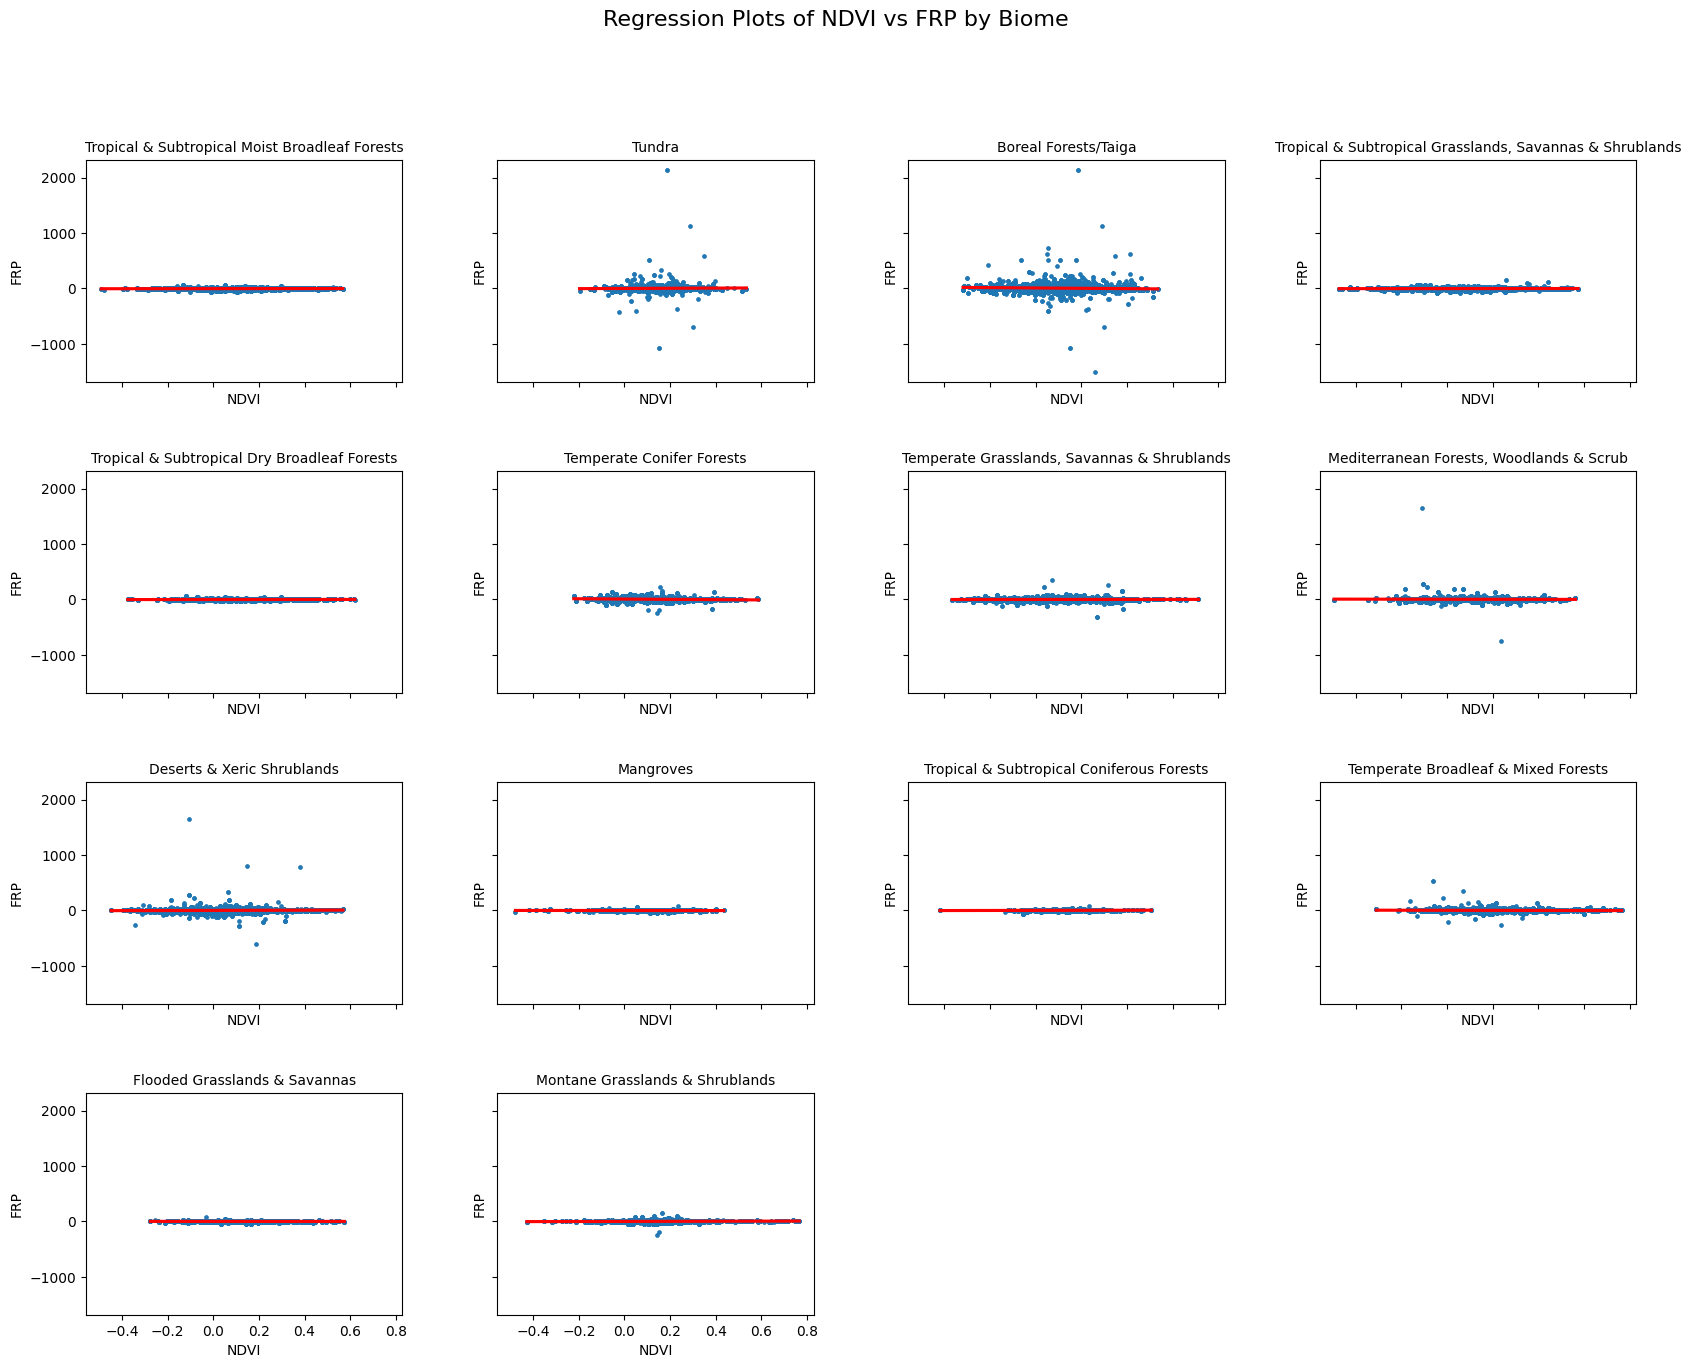

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the shapefiles
FRP_file = "/Users/ceedindia/Documents/FIRE/Trend/1deg_Grid_FRP_Trend_Metrics_Mean.shp"
Tau_file = "/Users/ceedindia/Documents/FIRE/grid_with_mean_ndvi.shp"
Biome_file = "/Users/ceedindia/Documents/FIRE/Global_Biome.shp"

# Read the GeoDataFrames
FRP_Trend = gpd.read_file(FRP_file)
TAU_Trend = gpd.read_file(Tau_file)
biomes_gdf = gpd.read_file(Biome_file)

# Merge FRP and TAU data on 'id' to get `beta`, `mean_frp_a`, and `mean_ndvi` together
merged_df = FRP_Trend.merge(TAU_Trend[['id', 'mean_ndvi']], on='id', how='inner')

# Perform a spatial join between the merged FRP-TAU data and the biomes to assign each grid cell to a biome
# This will add biome information (BIOME_NUM and BIOME_NAME) to the FRP-TAU data based on spatial location
merged_with_biomes = gpd.sjoin(merged_df, biomes_gdf[['BIOME_NUM', 'BIOME_NAME', 'geometry']], how='inner', predicate='intersects')

# Set up the plot grid
unique_biomes = merged_with_biomes['BIOME_NAME'].unique()
n_biomes = len(unique_biomes)
n_cols = 4  # Number of columns in the plot grid
n_rows = (n_biomes // n_cols) + 1

# Set up the figure and axis grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

# Loop over each biome and create a scatter plot with regression line
for i, biome in enumerate(unique_biomes):
    ax = axes[i]
    
    # Filter data for the current biome
    data = merged_with_biomes[merged_with_biomes['BIOME_NAME'] == biome]
    
    # Scatter plot with regression line
    sns.regplot(x='mean_ndvi', y='beta', data=data, ax=ax, scatter_kws={'s': 5}, line_kws={"color": "red"})
    
    # Set plot title and labels
    ax.set_title(biome, fontsize=10)
    ax.set_xlabel("NDVI")
    ax.set_ylabel("FRP")

# Remove any empty subplots (if the number of biomes doesn't fill the grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set main title
fig.suptitle("Regression Plots of NDVI vs FRP by Biome", fontsize=16)

# Show the plot
plt.show()